<a href="https://colab.research.google.com/github/Ankit6539/ALMABETTERGIT/blob/main/NETFLIX_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GIT HUB LINK  - https://github.com/Ankit6539/ALMABETTERGIT/blob/main/NETFLIX_.ipynb

# **Project Name - Netflix Movies and TV show clustering**

**Project Type** - Unsupervised

**Contribution** - Individual

**Team Member 1** - Ankit Gupta

# **Project Summary -**

The entertainment industry is highly competitive, and achieving success depends on various factors such as production budget, cast, genre, rating, and more. A recent study focused on understanding the elements that impact the popularity of movies and TV shows on Netflix. To achieve this, a dataset with around 12 variables was analyzed to cluster movies and TV shows based on audience preferences and their popularity.

The study began with data wrangling, which involved handling missing values and unique values. The director column had 2389 missing values, while the cast column had 718 missing values, the country column had 507, and the date_added column had 10 missing values. These missing values were removed by dropping the corresponding rows.

 the study conducted exploratory data analysis, which revealed that Netflix has more movies than TV shows, with 5372 movies and 2398 TV shows currently available. TV-MA was found to be the most common rating for both TV shows and movies, indicating that Netflix caters primarily to an adult audience with mature and potentially controversial themes. The years 2017 and 2018 had the highest number of movie releases, while 2020 had the highest number of TV show releases. The study also found that Netflix has been focusing more on increasing its movie content than TV shows since 2015.

The study then used six attributes - director, cast, country, genre, rating, and description - to cluster the shows. These attributes were transformed into a 10,000-feature TFInet_df vectorization, and Principal Component Analysis (PCA) was used to reduce the components to 3000, capturing more than 80% of the variance. K-Means and Agglomerative clustering algorithms were used to group the shows. K-Means suggested 5 optimal clusters, while Agglomerative clustering suggested 7 clusters, which were visualized using a dendrogram.

Finally, the study created a content-based recommender system using a similarity matrix obtained through cosine similarity. This system provides personalized recommendations based on the type of show the user has watched, giving them 10 top-notch suggestions to explore.

Overall, the study offers valuable insights into the key trends in the Netflix dataset, including the growth rate of movies versus TV shows, the busiest period for adding new content, and the content demographics. Through clustering and a content-based recommender system, personalized recommendations can be provided based on the user's viewing history. This study provides a foundation for further research and analysis on the factors influencing the popularity of movies and TV shows on Netflix.


# **Problem Statement**
This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In this project, we are required to do:

Exploratory Data Analysis.

Understanding what type content is available in different countries.

Is Netflix has increasingly focusing on TV rather than movies in recent years.

Clustering similar content by matching text-based features.

***Let's Begin !***

*1. Know Your Data*

**Import Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:

# Import Libraries

# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import missingno as msno
%matplotlib inline

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# library used for textual data prerocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from scipy.stats import ttest_ind
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# library used for Clusters impelementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# library used for building recommandation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Warnings library. Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **DATA SET LOADING**

In [26]:

#Loading CSV File

net_df = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

**DATA FIRST VIEW**

In [27]:

# Dataset First Look
net_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


**DATA ROWS AND COLUMN COUNT**

In [28]:
# Dataset Rows & Columns count
net_df.shape

(7787, 12)

DATASET INFORMATION

In [29]:

# Dataset Info
net_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# **DUPLICATE VALUES**

In [30]:
# Dataset Duplicate Value Count
# count the number of duplicate rows in the DataFrame
duplicate_rows = net_df[net_df.duplicated()]
duplicate_count = len(duplicate_rows)

# print the result
print("Number of duplicate rows: ", duplicate_count)

Number of duplicate rows:  0


# **Missing Values/Null Values**

In [31]:

# Missing Values/Null Values Count
net_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [32]:

#total null values
net_df.isnull().sum().sum()

3631

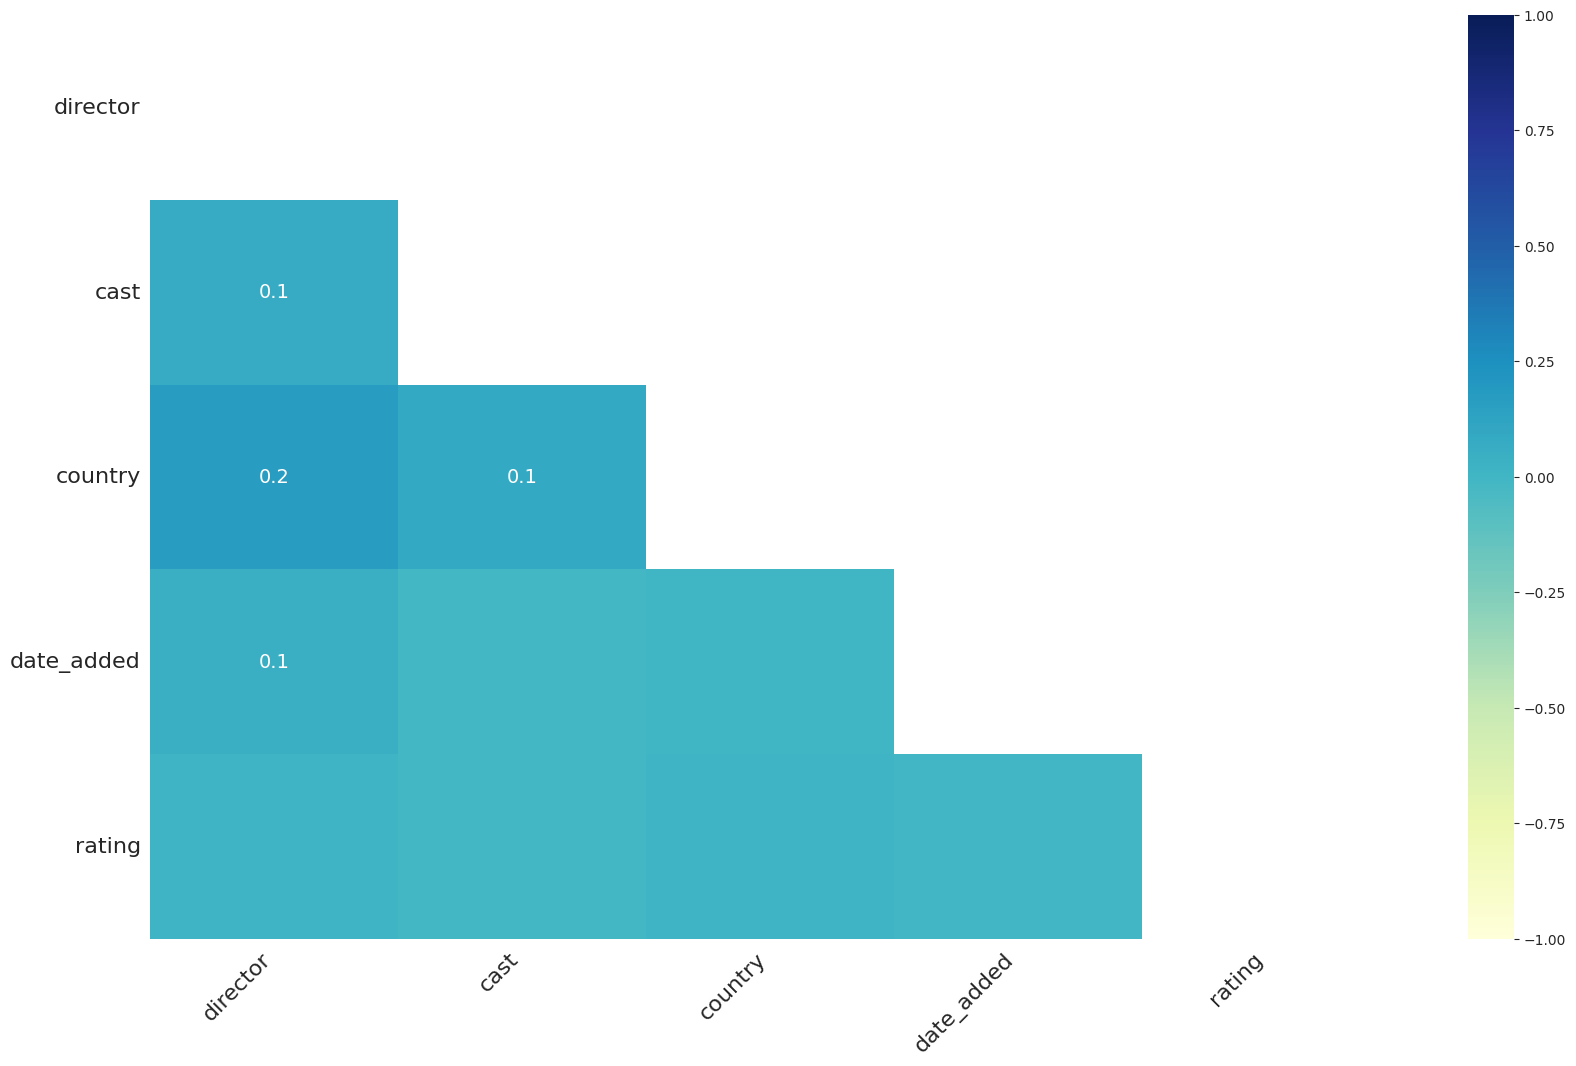

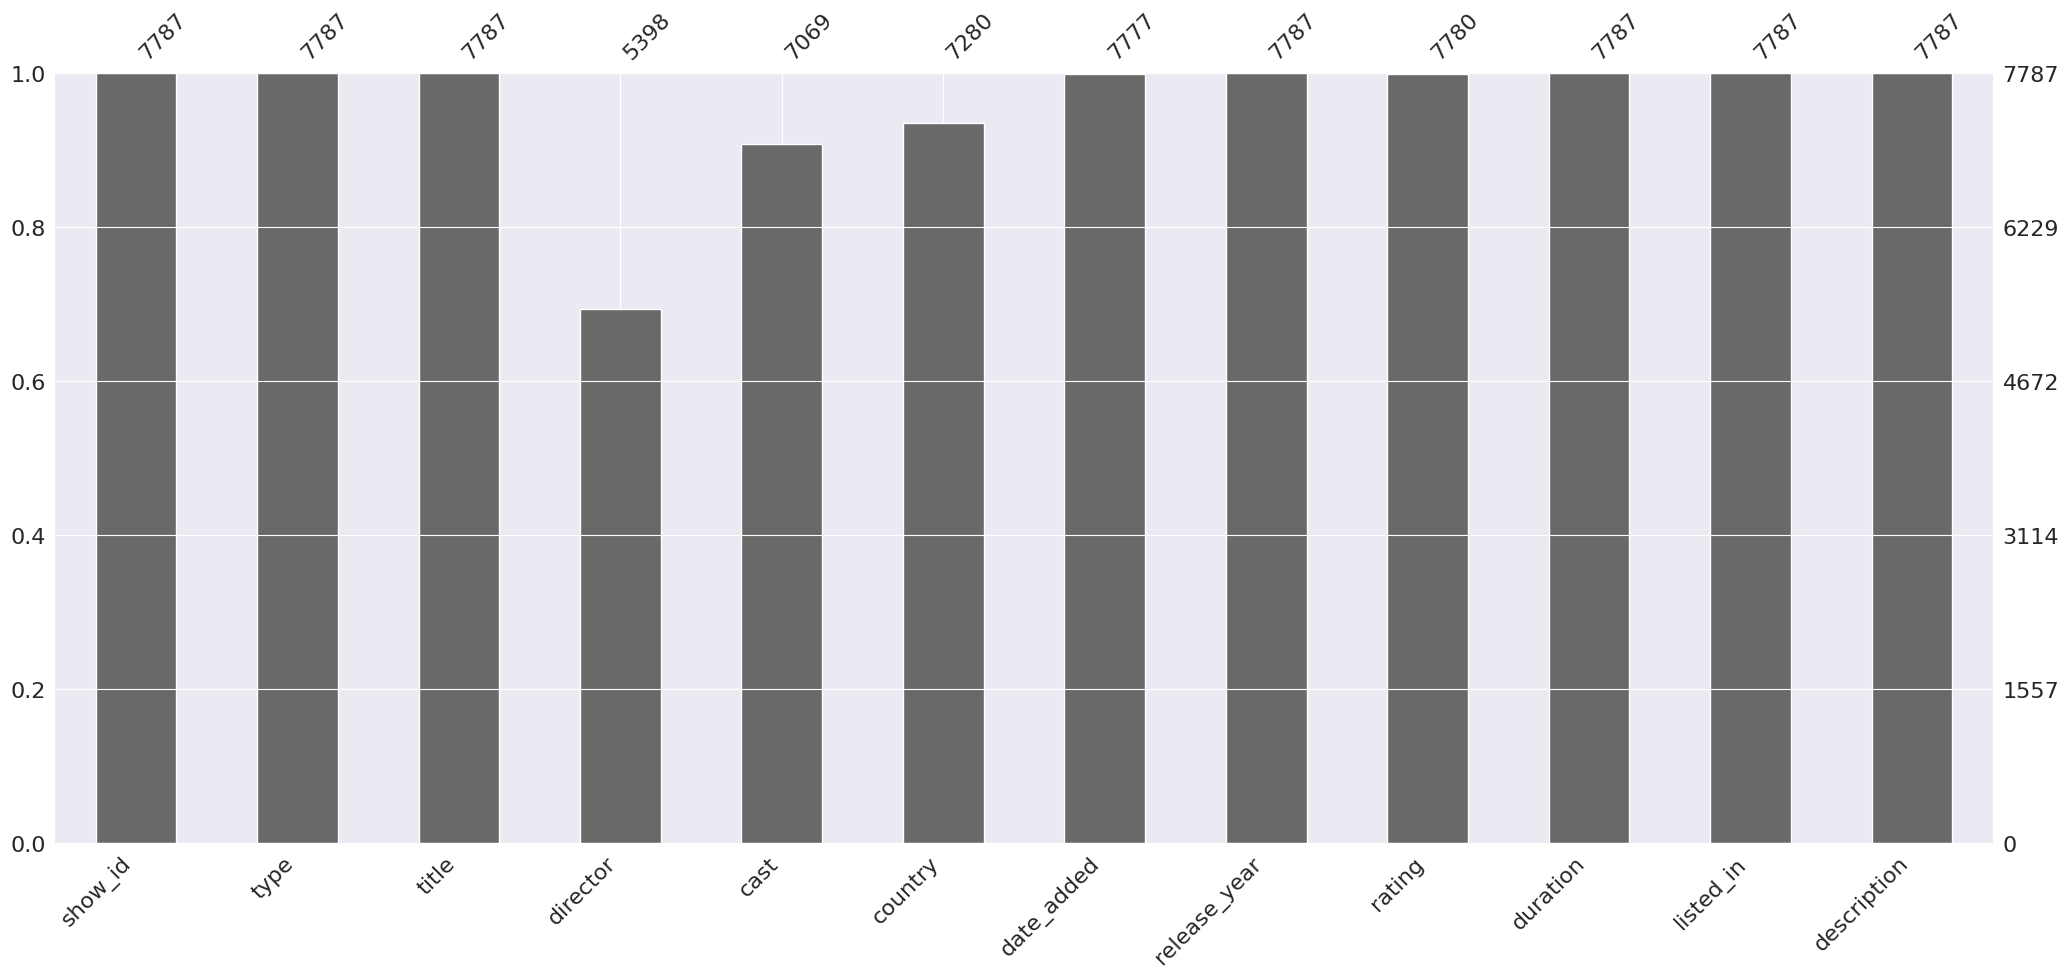

In [33]:
# Visualize missing data with a heatmap using the YlGnBu colormap
msno.heatmap(net_df, cmap='YlGnBu')
plt.show()

# Visualize missing data with a bar chart
msno.bar(net_df)
plt.show()

**What did you know about your dataset?**

The Dataset contains 7787 rows and 12 columns.Their are four columns containing missing values.The Total 3631 missing values present in the table.

***2. Understanding Your Variables***

In [34]:

# Dataset Columns
net_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [35]:

# Dataset Describe
net_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


**Variables Description**

**show_id** : Unique ID for every Movie / Tv Show

**type** : Identifier - A Movie or TV Show

**title **: Title of the Movie / Tv Show

**director** : Director of the Movie

**cast** : Actors involved in the movie / show

**country** : Country where the movie / show was produced

**date_added** : Date it was added on Netflix

**release_year** : Actual Releaseyear of the movie / show

**rating** : TV Rating of the movie / show

**duration** : Total Duration - in minutes or number of seasons

**listed_in** : Genere

**description**: The Summary description

Check Unique Values for each variable

In [36]:

# Check Unique Values for each variable.
# iterate over each column in the DataFrame
for col in net_df.columns:
    # get the unique values for the column
    unique_vals = net_df[col].unique()
    # print the column name and its unique values
    print(col, unique_vals)

show_id ['s1' 's2' 's3' ... 's7785' 's7786' 's7787']
type ['TV Show' 'Movie']
title ['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]
director [nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']
cast ['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'
 'Nasty C' 'Adriano Zumbo, Rachel Khoo']
country ['Brazil' 'Mexico' 'Singapore' 'United States' 'Turkey' 'Egypt' 'India'
 'Poland, United States' 'Thailand' 'Nigeria' nan
 'Norway, Ice

**3. Data Wrangling**

**Data Wrangling Code**

In [37]:

# Write your code to make your dataset analysis ready.
#Handling Null Values
net_df['cast'].fillna(value='No cast',inplace=True)
net_df['country'].fillna(value=net_df['country'].mode()[0],inplace=True)

In [38]:

#'date_added' and 'rating' contains an insignificant portion of the data so we will drop them from the dataset
net_df.dropna(subset=['date_added','rating'],inplace=True)

In [39]:

#again checking is there any null values are not
net_df.isnull().sum()

show_id            0
type               0
title              0
director        2376
cast               0
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

**What all manipulations have you done and insights you found?**

Filled the null values in 'cast' column with 'No cast' Filled the null values in 'country' column with the mode of the column Dropped rows with null values in 'date_added' and 'rating' columns Dropped 'director' column Checked if there are any remaining null values in the dataset Some possible insights that can be derived from this dataset after the manipulations are done include:

The most common country for Netflix content is likely the country that filled in the null values for the 'country' column The 'cast' column is important in the dataset, as there were null values that needed to be filled in order to keep the data complete The 'date_added' and 'rating' columns may not be important in the dataset, as they were dropped due to a small number of null values. However, this would depend on the specific analysis being done. The 'director' column was dropped, which may indicate that it is not a useful feature for the analysis

*4. Data Vizualization, Storytelling & Experimenting with charts :

Understand the relationships between variables*

**Chart - 1.Type**

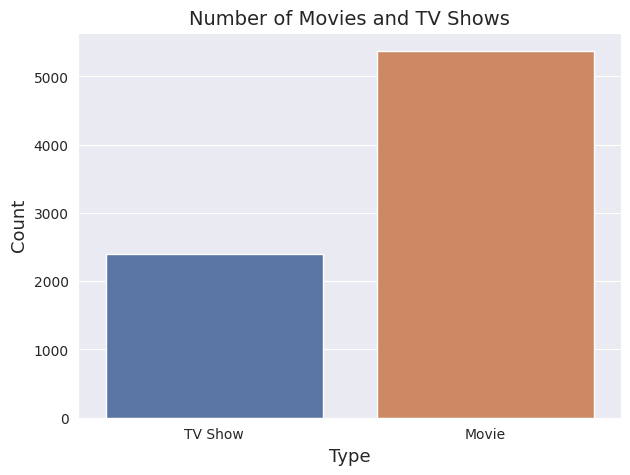

In [40]:
# Chart - 1 visualization code
sns.set_style('darkgrid')
plt.figure(figsize=(7, 5))
sns.countplot(x='type', data=net_df, palette='deep')
#labeling of values
plt.title('Number of Movies and TV Shows', fontsize=14)
plt.xlabel('Type', fontsize=13)
plt.ylabel('Count', fontsize=13)
#Visualization of number of movies and tv shows
plt.show()

1. Why did you pick the specific chart?
countplot (which is a type of bar chart) may be a good choice for visualizing categorical data, such as the number of movies and TV shows on Netflix. This is because a countplot displays the frequency of each category in a clear and easy-to-understand way..

2. What is/are the insight(s) found from the chart?
On Netflix, the count of movies surpasses that of TV shows, with 5372 movies and 2398 TV shows currently offered on the platform

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

While the fact that there are more movies than TV shows on Netflix may not have a significant positive or negative impact on its own, it can be combined with other insights to inform business decisions. For example, if Netflix observes that its subscribers prefer TV shows over movies, it may choose to focus more on acquiring TV show content to meet their preferences. Conversely, if original movies produced by Netflix gain more popularity, it may consider investing more in this area.

In terms of negative impact, the particular insight that Netflix has more movies than TV shows is not likely to harm its business on its own. However, if Netflix ignores its subscribers' preferences and continues to acquire movies over TV shows, it could potentially lose subscribers looking for more TV show content. Additionally, if Netflix's competitors offer more TV shows, it may lose market share if it does not respond by acquiring more TV show content.

Chart - 2.**Rating**

In [41]:

# Chart - 2 visualization code
net_df['rating']

0       TV-MA
1       TV-MA
2           R
3       PG-13
4       PG-13
        ...  
7782    TV-MA
7783    TV-14
7784    TV-MA
7785    TV-PG
7786    TV-MA
Name: rating, Length: 7770, dtype: object

In [42]:
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

net_df['target_ages'] = net_df['rating'].map(ratings)

In [43]:

# convert 'type' column to categorical data type
net_df['type'] = pd.Categorical(net_df['type'])

# create a new categorical column 'target_ages' with specified categories
net_df['target_ages'] = pd.Categorical(net_df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [44]:

net_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,Adults
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Teens
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",Adults
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,Older Kids


In [45]:

#creating two extra columns
tv_shows=net_df[net_df['type']=='TV Show']
movies=net_df[net_df['type']=='Movie']

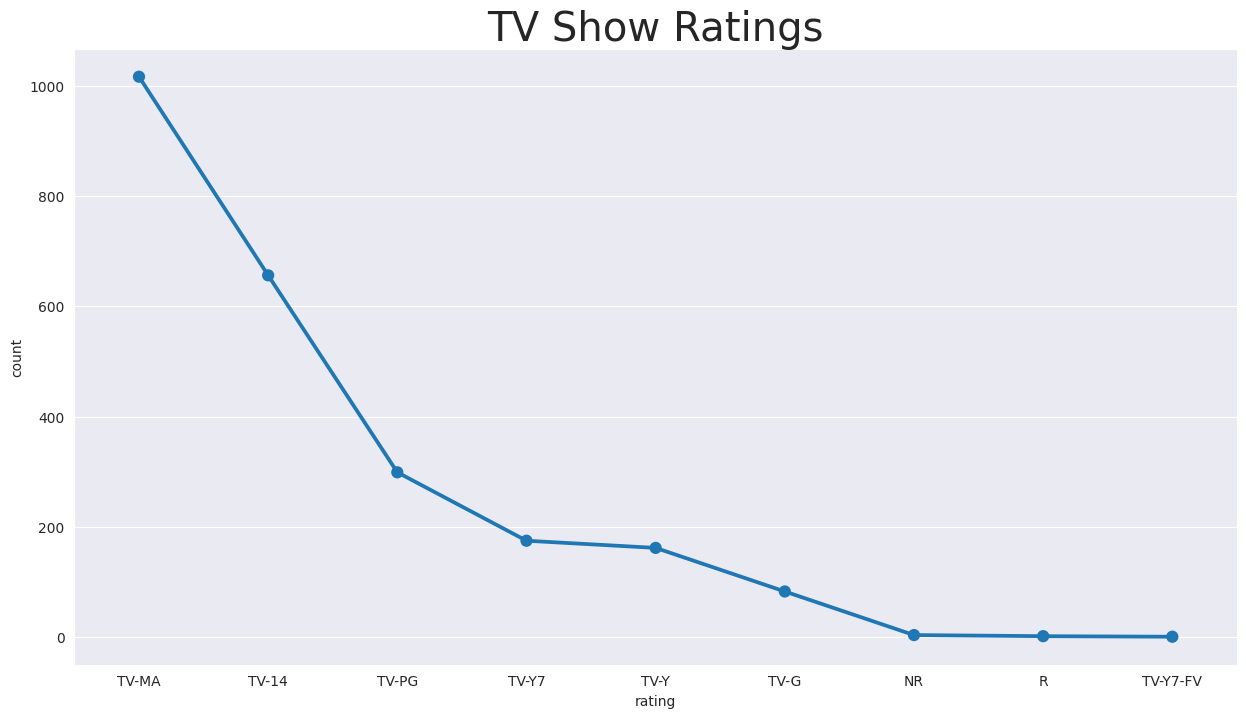

In [46]:

# group TV shows by 'rating' and count the number of shows in each rating category
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)

# set figure dimensions
fig_dims = (15,8)

# create a figure and axis object with specified dimensions
fig, ax = plt.subplots(figsize=fig_dims)

# create a point plot using Seaborn's pointplot() function, with 'rating' on the x-axis and 'count' on the y-axis
sns.pointplot(x='rating',y='count',data=tv_ratings)

# set the plot title and font size
plt.title('TV Show Ratings',size='29')

# display the plot
plt.show()

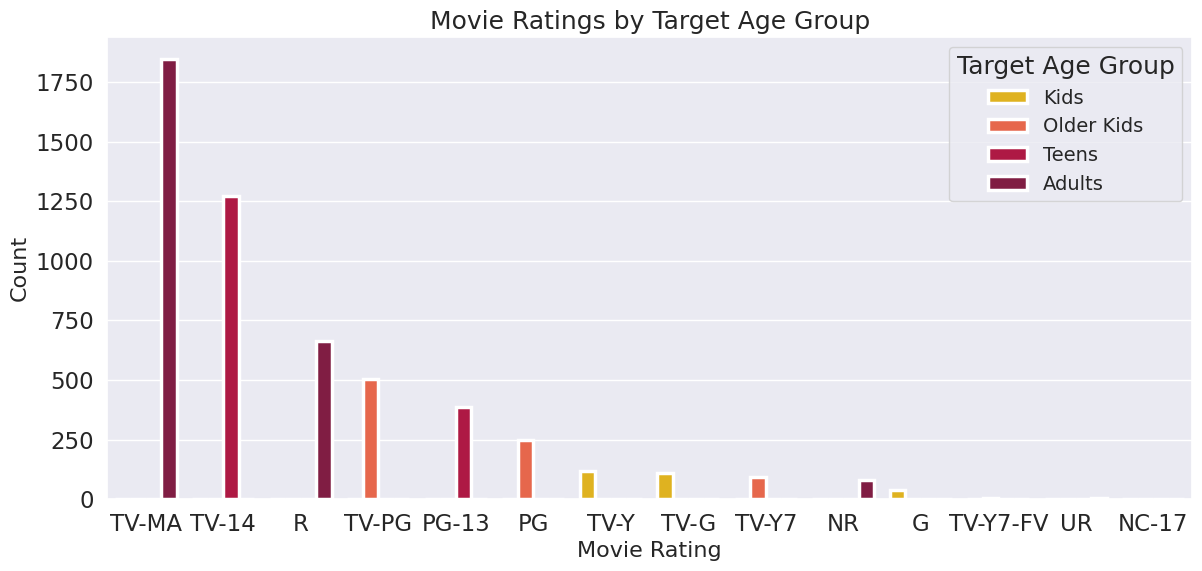

In [47]:

# create a color palette for the different target age groups
colors = ["#FFC300", "#FF5733", "#C70039", "#900C3F"]

# set the font size
sns.set(font_scale=1.5)

# plot a countplot to show the movie ratings based on target age groups
plt.figure(figsize=(14,6))
plt.title('Movie Ratings by Target Age Group')

# change the color palette and linewidth
sns.countplot(x=movies['rating'], hue=movies['target_ages'], data=movies,
              order=movies['rating'].value_counts().index, palette=colors, linewidth=2.5)

# add a legend to the plot and increase the fontsize
plt.legend(title='Target Age Group', loc='upper right', labels=['Kids', 'Older Kids', 'Teens', 'Adults'], fontsize=14)

# set the x-label and y-label font size
plt.xlabel('Movie Rating', fontsize=16)
plt.ylabel('Count', fontsize=16)

plt.show()

1. Why did you pick the specific chart?
I selected this visual representation as it presents a clear and succinct depiction of how TV show ratings are distributed. The bar graph allows for easy comparison among the different rating categories, and the ordering by count, from the most to the least frequent, highlights the prevalence of TV-MA. As a result, this chart effectively summarizes the landscape of TV show ratings on Netflix, providing a rapid and informative overview.

2. What is/are the insight(s) found from the chart?
Based on the data, it can be inferred that Netflix's content is geared more towards adult audiences as TV-MA is the most prevalent rating for both movies and TV shows in the dataset. This suggests that a substantial proportion of the platform's offerings are intended for mature audiences and may contain sensitive or contentious themes. In particular, the TV-MA rating appears most frequently in the 'rating' column for TV shows, further highlighting the platform's emphasis on mature content.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the data can have both positive and negative implications for Netflix's business strategy. By recognizing that TV-MA is the most common rating for both movies and TV shows, Netflix can continue to produce and acquire content that is targeted towards adults, which can help attract and retain subscribers who are interested in mature and potentially controversial themes. Furthermore, this understanding of the different age groups targeted by each rating can also assist Netflix in marketing and promoting their content to the appropriate audiences.

However, there is also a potential negative impact to consider. The prevalence of mature content on the platform may deter some subscribers who are seeking more family-friendly programming, leading to a loss of subscribers who are uncomfortable with or uninterested in adult themes. To avoid isolating any particular demographic, it is vital for Netflix to strike a balance in its content offerings, catering to a wide range of viewers.

Chart - 3.**Release Year**

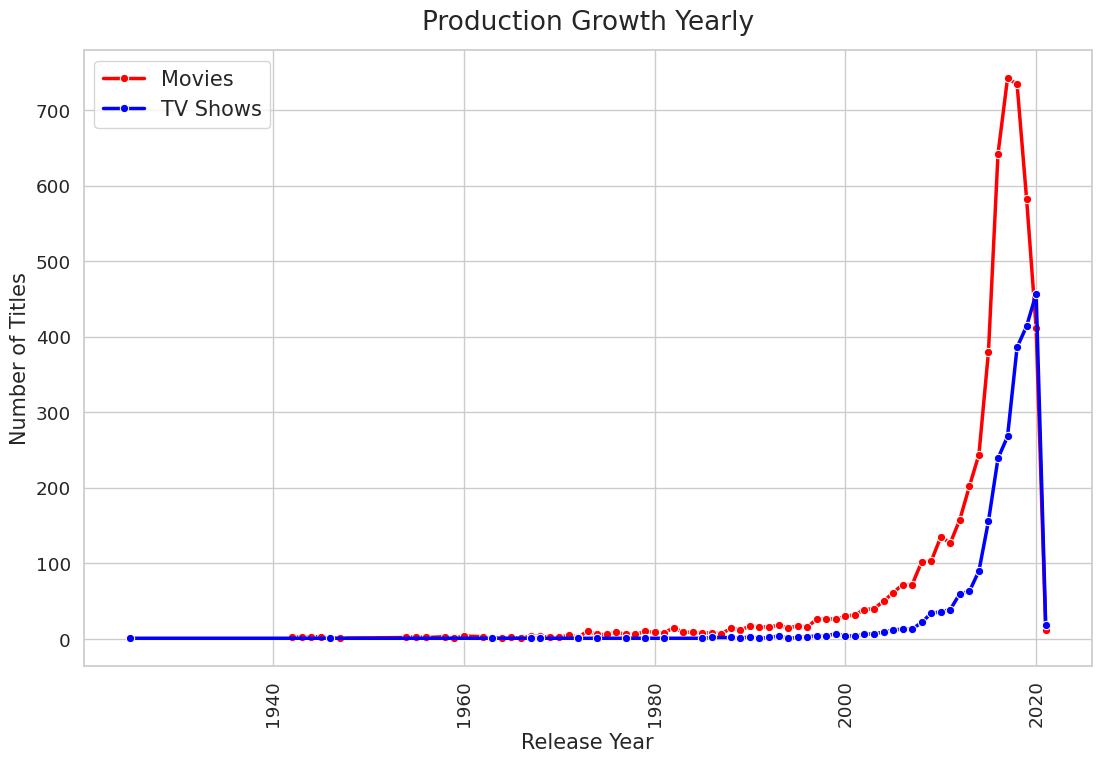

In [48]:
#Creating a line chart to visualize the number of movies and TV shows released each year
#Extracting the count of movies and TV shows for each year
movies_year = movies['release_year'].value_counts().sort_index(ascending=False)
tvshows_year = tv_shows['release_year'].value_counts().sort_index(ascending=False)

#Creating a line plot using Seaborn
sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(13, 8))

ax = sns.lineplot(x=movies_year.index, y=movies_year.values, color='red', label='Movies', linewidth=2.5, marker='o')
ax = sns.lineplot(x=tvshows_year.index, y=tvshows_year.values, color='blue', label='TV Shows', linewidth=2.5, marker='o')

#Customizing the plot
plt.xticks(rotation=90)
ax.set_xlabel('Release Year', fontsize=15)
ax.set_ylabel('Number of Titles', fontsize=15)
ax.set_title('Production Growth Yearly', fontsize=19, pad=15)
plt.legend(fontsize=15)

plt.show()

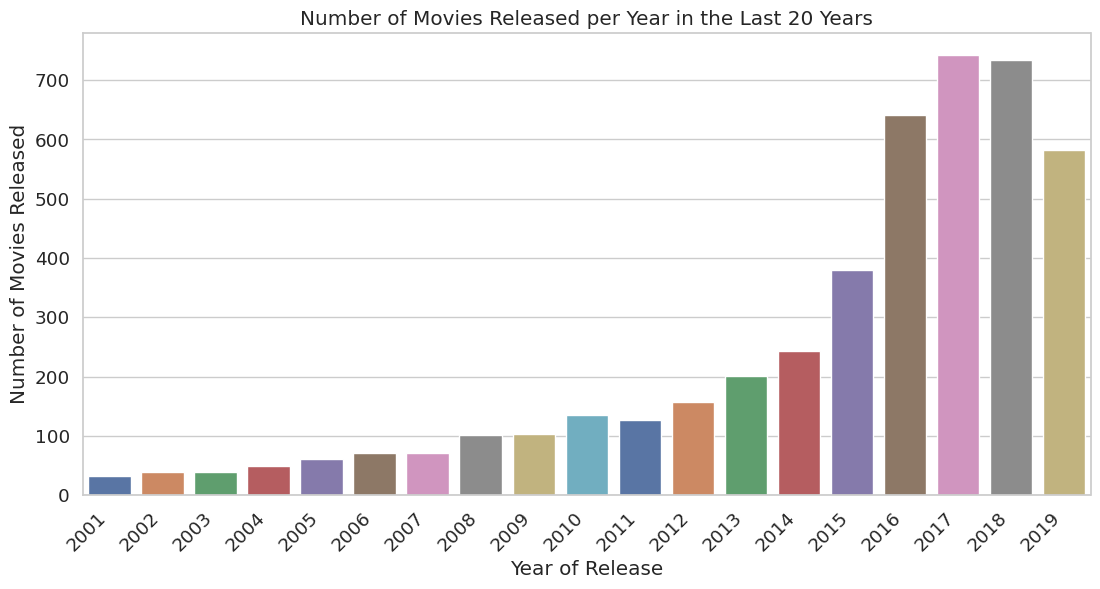

In [49]:

# Extract the last 20 years from the dataset
last_20_years = range(2001, 2020)

# Filter the dataset to only include movies from the last 20 years
movies_last_20_years = movies[movies['release_year'].isin(last_20_years)]

# Create a count plot of the number of movies released per year
plt.figure(figsize=(13,6))
sns.countplot(x='release_year', data=movies_last_20_years, palette='deep', order=last_20_years)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Year of Release')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released per Year in the Last 20 Years')
plt.show()

In [50]:

tvshows_year

2021     19
2020    457
2019    414
2018    386
2017    268
2016    239
2015    156
2014     90
2013     63
2012     60
2011     39
2010     36
2009     34
2008     22
2007     13
2006     13
2005     12
2004      9
2003      7
2002      6
2001      4
2000      4
1999      7
1998      4
1997      4
1996      3
1995      2
1994      1
1993      4
1992      2
1991      1
1990      3
1989      1
1988      2
1986      2
1985      1
1981      1
1979      1
1977      1
1974      1
1972      1
1968      1
1967      1
1963      1
1946      1
1925      1
Name: release_year, dtype: int64

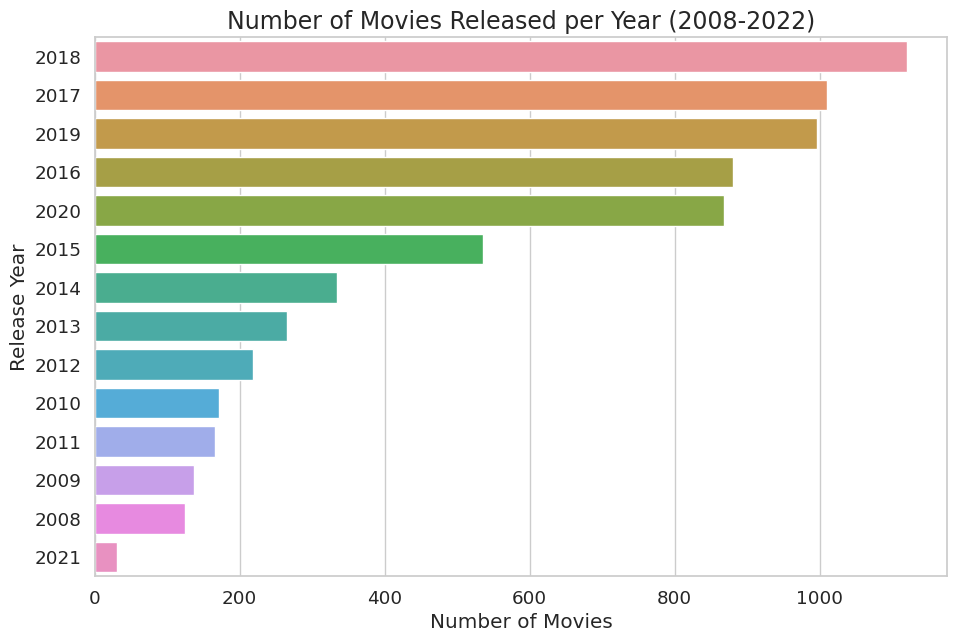

In [51]:

# filter for movies released in the last 15 years
movies_last_15_years = net_df[net_df['release_year'] >= 2008]

# create a countplot with horizontal bars
plt.figure(figsize=(11,7))
sns.countplot(y='release_year', data=movies_last_15_years, order=movies_last_15_years['release_year'].value_counts().index[:15])
plt.title('Number of Movies Released per Year (2008-2022)', fontsize=17)
plt.xlabel('Number of Movies')
plt.ylabel('Release Year')
plt.show()

In [52]:

net_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,Adults
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Teens
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",Adults
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,Older Kids


In [53]:

#adding columns of month and year of addition

net_df['month'] = pd.DatetimeIndex(net_df['date_added']).month
net_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1


1. Why did you pick the specific chart?

A suitable chart for displaying the number of movies and TV shows released on Netflix per year from 2015 to 2020 would be either a line chart or a bar chart. Both chart types would allow for a clear and easy comparison between the number of movies and TV shows released in each year, while also revealing any patterns or trends in the data. Alternatively, a stacked bar chart or a stacked area chart could also be used to indicate the proportion of movies and TV shows released in each year.

The reason for choosing this particular chart is that it effectively demonstrates the disparity between the growth rates of movies and TV shows on Netflix. By visualizing the data, the chart clearly shows that the number of movies released on the platform is increasing at a faster rate than the number of TV shows. Furthermore, it highlights the trends of increased content production from 2015 to 2020, followed by a decline in 2021. Overall, this chart serves as a valuable tool for understanding the changes and trends in Netflix's content production over the years.

2. What is/are the insight(s) found from the chart?
The data indicates that 2017 and 2018 had the largest number of movies released, while 2020 had the highest number of TV show releases. Additionally, there has been a significant rise in both the number of movies and TV show episodes on Netflix since 2015, with a noticeable decline in production after 2020.

The rate of increase in movies on Netflix has been notably higher than that of TV shows, suggesting that Netflix has prioritized expanding its movie offerings. This trend is highlighted by the fact that the years with the highest number of releases were dominated by movies rather than TV shows.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the analysis present both opportunities and challenges for Netflix. The company could benefit from the knowledge that focusing on movie content may attract and retain a larger audience. However, the decline in production after 2020 may indicate potential obstacles or insufficient investment in content creation, which could negatively impact Netflix's growth and competitiveness in the market. Therefore, it is crucial for Netflix to remain vigilant of market trends and to adjust its strategies accordingly to ensure continued success.

**Chart - 4.Release_month**

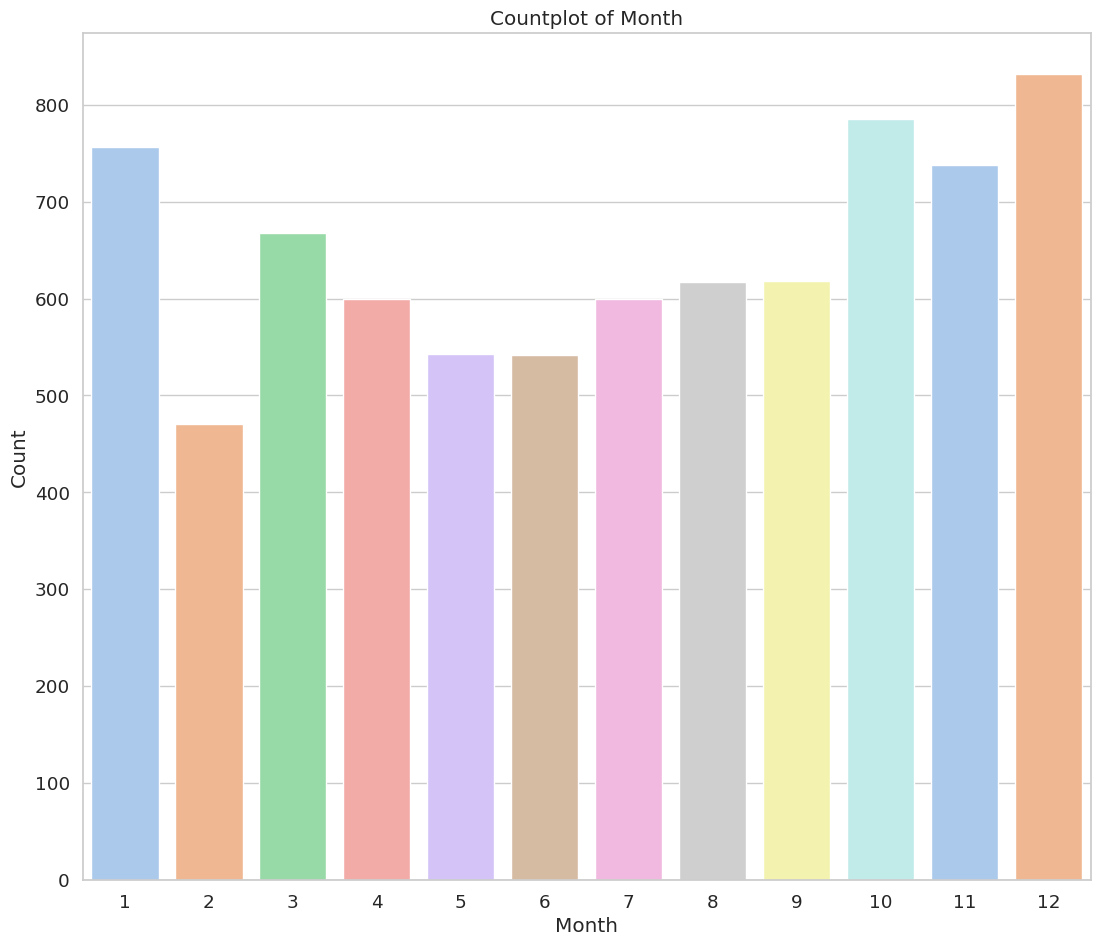

In [54]:

# Chart - 4 visualization code
#visualization of month of movie release
plt.figure(figsize=(13, 11))
sns.countplot(x='month', data=net_df, palette='pastel')
plt.title('Countplot of Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


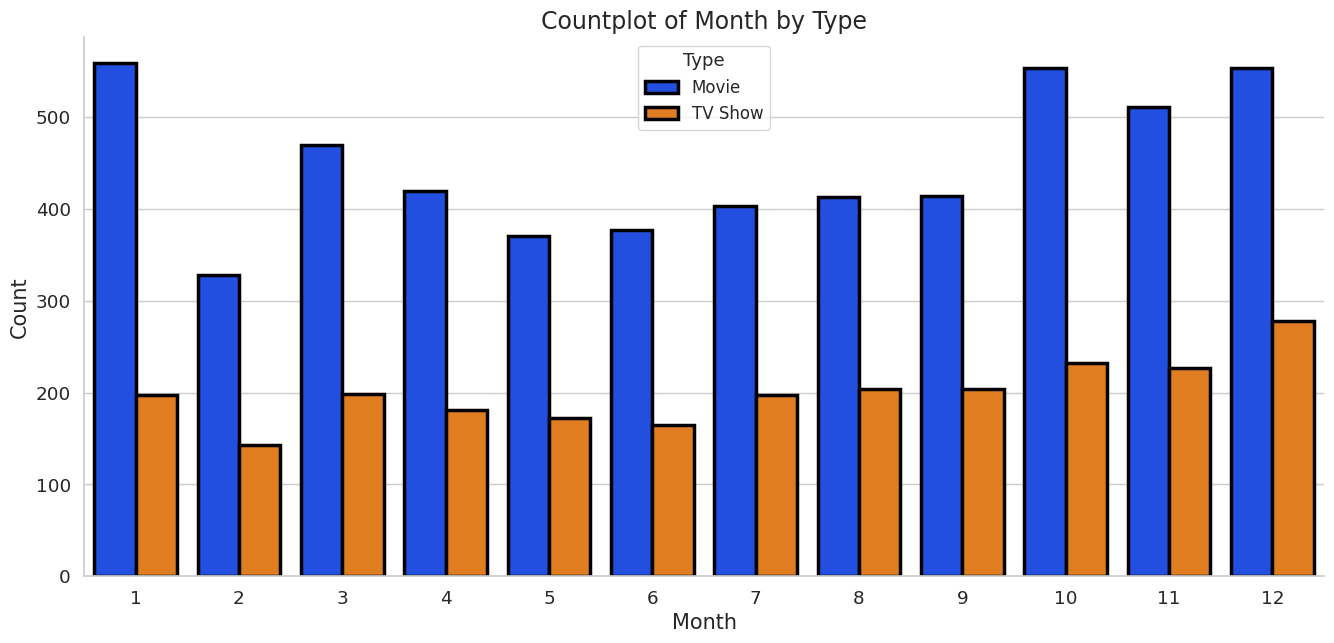

In [55]:
#Countplot of Month by Type
fig, ax = plt.subplots(figsize=(16, 7))

sns.countplot(x='month', hue='type', data=net_df, palette='bright', ax=ax, edgecolor='black', linewidth=2.5)
ax.set_title('Countplot of Month by Type', fontsize=17)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.legend(fontsize=12, title='Type', title_fontsize=13)
sns.despine()
plt.show()

**1. Why did you pick the specific chart?**

I selected this chart because it provides a straightforward and intuitive way to examine the monthly count of movies and TV shows added to Netflix. The use of hue allows us to distinguish between movies and TV shows, making it easier to observe any patterns or fluctuations in the data.

Based on this countplot, we can see that the number of movies and TV shows added to Netflix varied throughout the year, with some months exhibiting higher counts than others. From October to January, there was a clear surge in the number of movies and TV shows added to Netflix, which could be an indication of increased demand for new content during the winter season.

This insight could be useful for both Netflix and content creators, as it could inform the timing of new content releases to maximize viewership and revenue. By identifying these patterns, they could potentially increase engagement and attract more subscribers, ultimately leading to increased growth and success for the company.

**2. What is/are the insight(s) found from the chart?**

Based on the countplot with hue, it can be observed that the months between October and January have the highest number of new movie and TV show releases on Netflix. This suggests that this period may be the most active time of the year for Netflix in terms of adding new content to their platform.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

The insight gained from the countplot that the highest number of movies and TV shows are added to Netflix from October to January can be leveraged by the company to improve user engagement and potentially increase business growth. Netflix can use this information to plan its content acquisition and release strategy in a way that maximizes user interest during these months, for instance, by acquiring popular titles and releasing them strategically. However, it is crucial for Netflix to consider other factors such as user preferences, changing market trends, and competition to create a comprehensive strategy that will lead to sustained growth. Failure to do so could result in inadequate content selection and acquisition strategy, leading to negative growth for the company.

**Chart - 5.Genre**

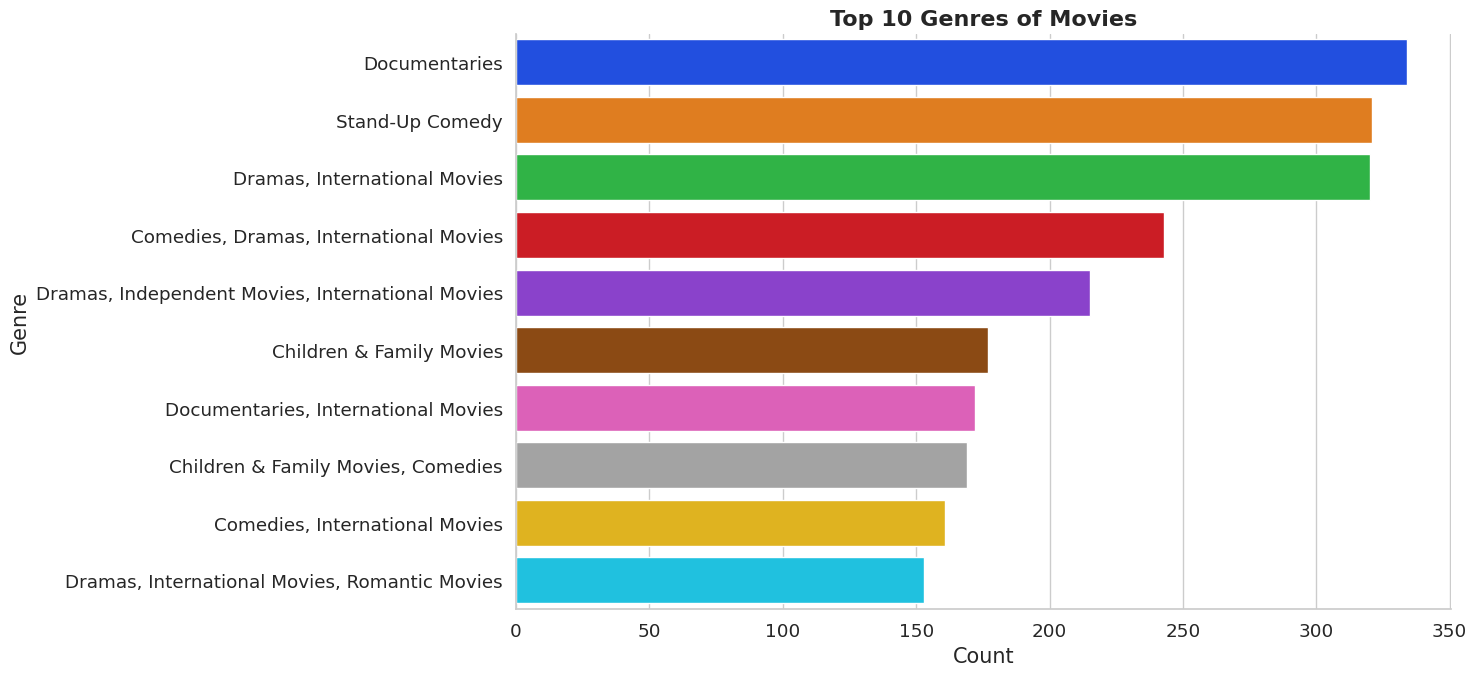

In [56]:

# Chart - 5 visualization code
#Top 10 genres of movies
top10_movies = movies['listed_in'].value_counts().index[0:10]
#Visualization of code
plt.figure(figsize=(15, 7))
sns.countplot(y='listed_in', data=movies, order=top10_movies, palette='bright')
plt.title('Top 10 Genres of Movies', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=15)
plt.ylabel('Genre', fontsize=15)
sns.despine()
plt.tight_layout()
plt.show()

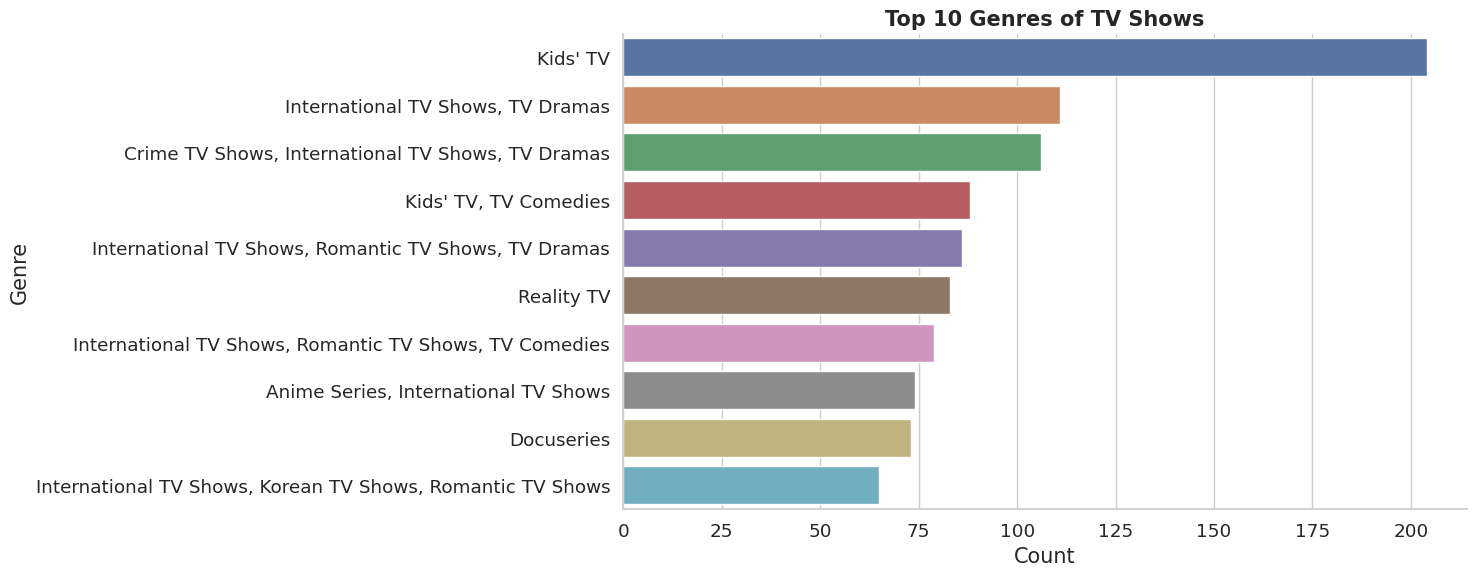

In [57]:

#Top 10 Genres of Tv shows
top10_tvshows = tv_shows['listed_in'].value_counts().index[0:10]
#Visualization
plt.figure(figsize=(15, 6))
sns.countplot(y='listed_in', data=tv_shows, order=top10_tvshows, palette='deep')
plt.title('Top 10 Genres of TV Shows', fontsize=15, fontweight='bold')
plt.xlabel('Count', fontsize=15)
plt.ylabel('Genre', fontsize=15)
sns.despine()
plt.tight_layout()
plt.show()

1. Why did you pick the specific chart?

To know the count of netflix shows and tv shows.

2. What is/are the insight(s) found from the chart?

Netflix's kids TV genre is a popular category that caters to viewers of all ages. This particular genre has an extensive collection of animated and live-action shows, which offers a blend of entertainment and education to young viewers. From popular classic shows like SpongeBob SquarePants and Power Rangers to new and exciting series like Carmen Sandiego and The Dragon Prince, Netflix's kids TV category provides a variety of options for every child.

Not only is this category diverse, but it also ensures a safe and secure environment for kids to watch their favorite shows. Netflix understands the concerns of parents and has implemented various features to address them. The parental controls feature enables parents to set appropriate content filters, keep track of their children's viewing history, and restrict access to certain movies or shows.

Whether it's a gloomy day or family bonding time, Netflix's kids TV category is an excellent option to keep children engaged and entertained. The wide selection of entertaining and informative content available in this genre has made it one of the most popular and successful on the platform.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Netflix's kids TV genre is among the most popular, featuring a wide variety of educational and entertaining content suitable for children of different ages. Notable shows on this platform include "Paw Patrol", "Peppa Pig", "The Magic School Bus", and "Stranger Things."

Netflix can utilize this information to benefit their business in several ways. By understanding which genres are most appealing, they can develop and promote more high-quality kids shows and other relevant content to attract and retain viewers. However, there could also be a negative impact if Netflix overly focuses on kids TV shows and disregards other genres, potentially alienating older viewers seeking more mature content. Moreover, a decline in the quality of their kids programming or loss of popular shows could hurt their business. Therefore, it's crucial for Netflix to find a balance between catering to their primary audience while still providing a diverse selection of content that appeals to a broad audience.

Chart - 6.Duration

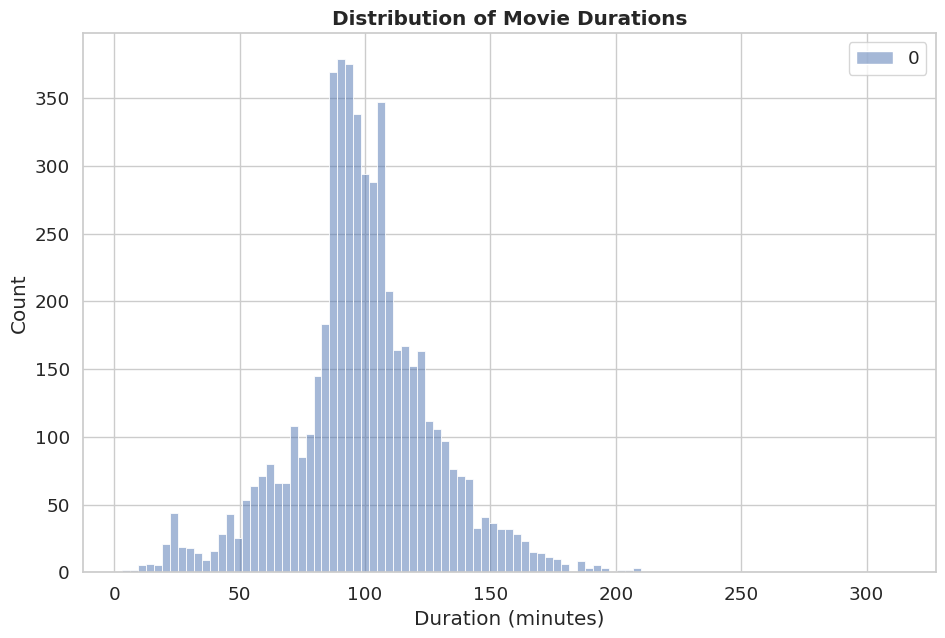

In [58]:
# Chart - 6 visualization code
# Create a figure and set its size
plt.figure(figsize=(11, 7))

# Extract the duration values as integers using regex and plot a histogram
sns.histplot(movies['duration'].str.extract('(\d+)').astype(int), kde=False, color='blue')

# Set the title of the plot
plt.title('Distribution of Movie Durations', fontweight='bold')

# Set the x-axis label
plt.xlabel('Duration (minutes)')

# Set the y-axis label
plt.ylabel('Count')

# Show the plot
plt.show()

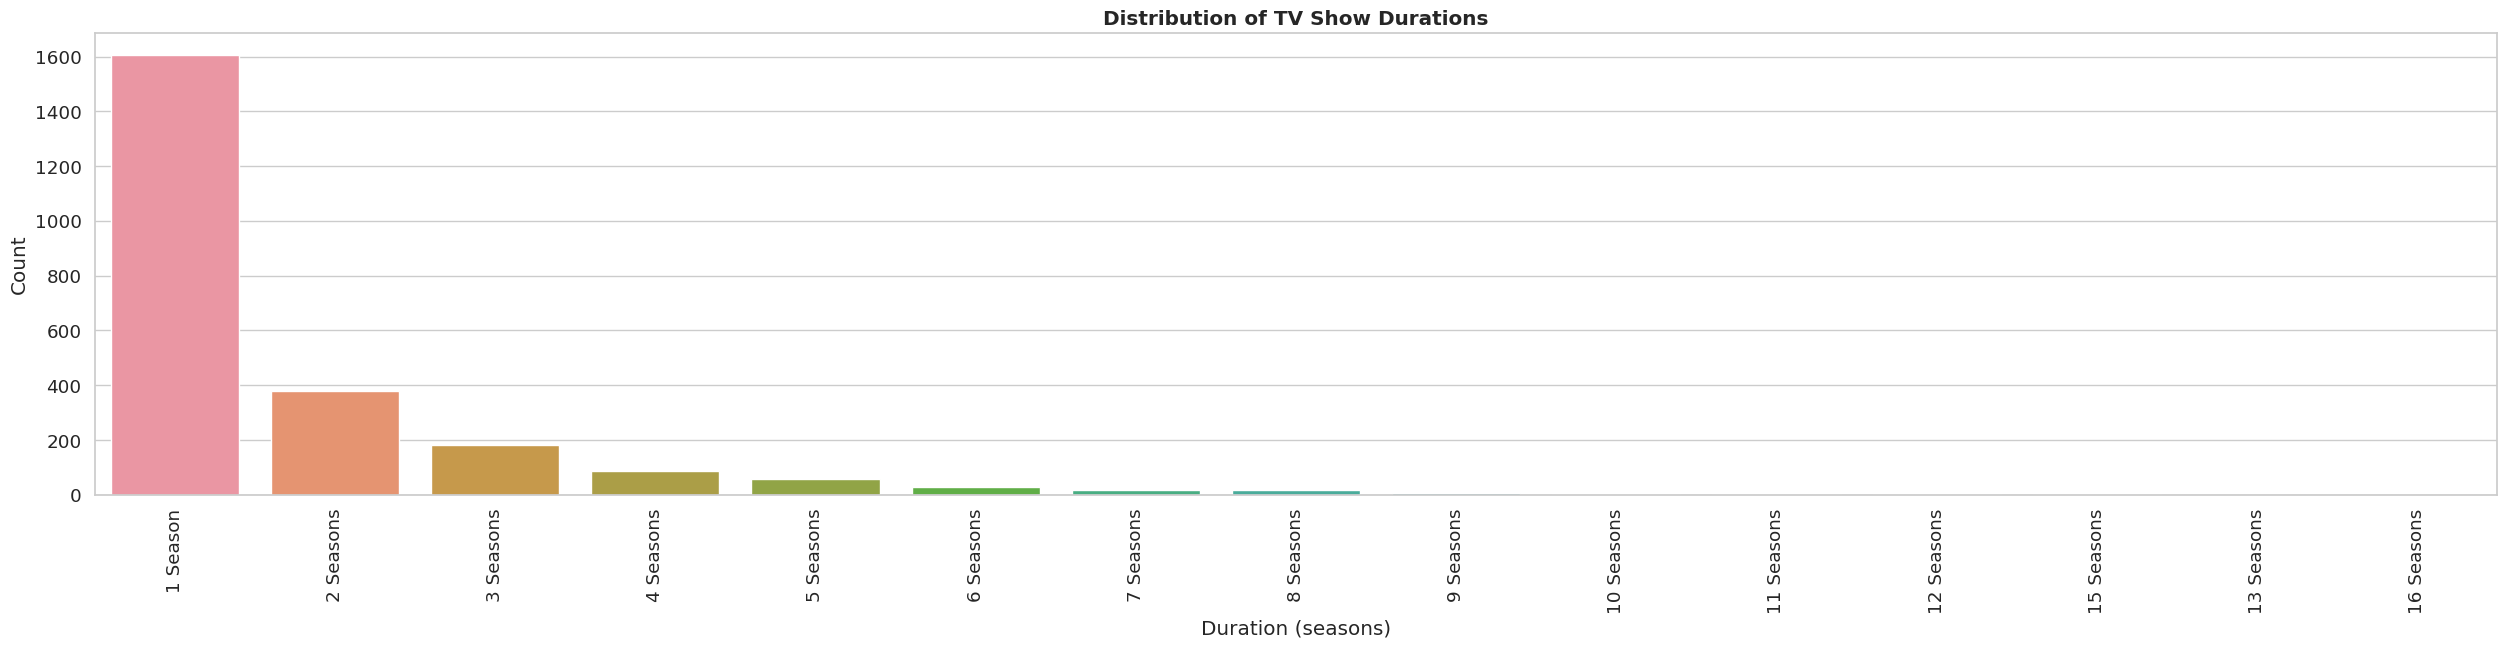

In [59]:

# Set the figure size
plt.figure(figsize=(31, 6))

# Create a count plot of TV show durations
sns.countplot(x=tv_shows['duration'], data=tv_shows, order=tv_shows['duration'].value_counts().index)

# Set the title of the plot
plt.title("Distribution of TV Show Durations", fontweight='bold')

# Set the x-axis label
plt.xlabel("Duration (seasons)")

# Set the y-axis label
plt.ylabel("Count")

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

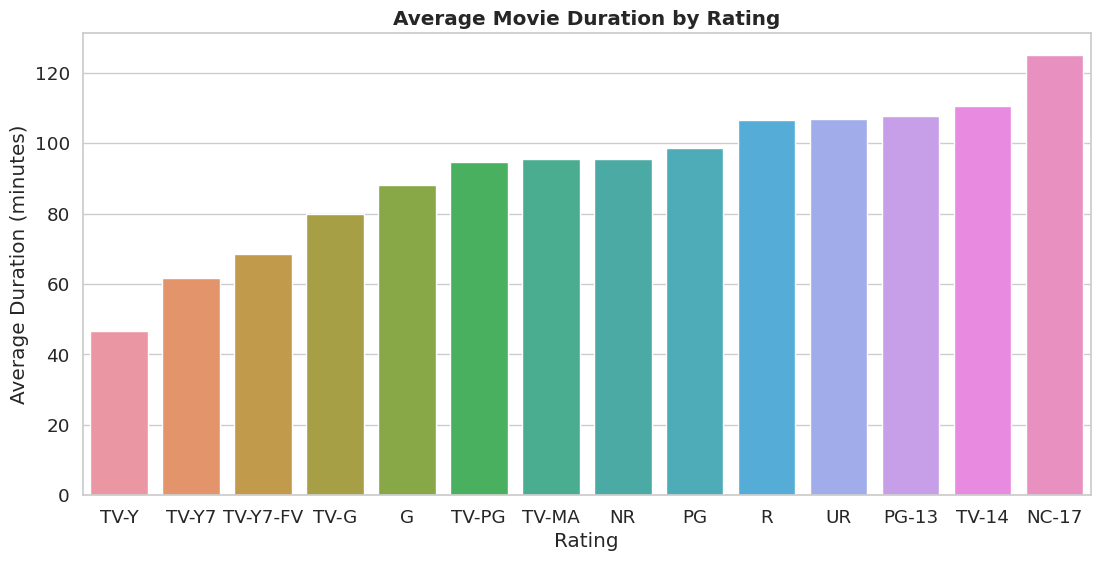

In [60]:

# Extract the duration values as integers using regex
movies['minute'] = movies['duration'].str.extract('(\d+)').apply(pd.to_numeric)

# Calculate the average movie duration by rating
duration_year = movies.groupby(['rating'])['minute'].mean()

# Create a DataFrame to store the results and sort by average duration
duration_net_df = pd.DataFrame(duration_year).sort_values('minute')

# Set the figure size
plt.figure(figsize=(13, 6))

# Create a bar plot of the average movie duration by rating
ax = sns.barplot(x=duration_net_df.index, y=duration_net_df.minute)

# Set the title of the plot
plt.title("Average Movie Duration by Rating", fontweight='bold')

# Set the x-axis label
plt.xlabel("Rating")

# Set the y-axis label
plt.ylabel("Average Duration (minutes)")

# Show the plot
plt.show()

1. Why did you pick the specific chart?

Analyzing the relationship between movie duration and rating through a chart can reveal insights that could be beneficial for various stakeholders in the movie industry. For instance, the chart mentioned in your question demonstrates that NC-17 rated movies generally have longer runtimes, which could be an essential consideration for filmmakers and studios seeking to produce movies of that rating.

Moreover, the chart also indicates that TV-Y rated movies usually have shorter runtimes, which could be helpful for parents searching for suitable content for their kids. Therefore, a chart comparing movie durations and ratings can offer valuable insights to filmmakers, studios, distributors, and viewers alike, enabling them to make informed decisions based on data.

2. What is/are the insight(s) found from the chart?

Upon examining the movie durations, it was found that the majority of movies on Netflix have a runtime between 50 to 150 minutes. Moreover, a significant number of TV shows on the platform have only one season, indicating that the majority of the TV shows available on Netflix are relatively new.

The analysis also revealed that NC-17 rated movies tend to have the longest runtime, potentially because these movies often explore mature themes that require a longer runtime to fully convey. Conversely, movies with a TV-Y rating, which is suitable for all children, have the shortest average runtime. This suggests that movies in this category are usually shorter and have simpler plots and themes appropriate for younger viewers. This information could be valuable for content creators and distributors looking to understand viewer preferences and trends in the movie industry.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

The insights obtained from analyzing audience behavior can potentially have a positive impact on businesses in the movie industry and streaming platforms, as it can help them understand their audience's preferences and create tailored content. For instance, if they observe that movies with a mature rating tend to have longer runtimes, they may choose to focus on creating lengthier, more mature content for adult viewers. On the other hand, insights can also have a negative impact on growth, such as if studios or platforms notice that most TV shows have only one season, they may hesitate to invest in producing more seasons of a show, even if it has a dedicated fanbase. Similarly, if they observe that movies with certain ratings consistently perform poorly, they may avoid investing in similar projects in the future, limiting the variety of content available to viewers. Ultimately, it is essential for businesses to carefully consider the potential positive and negative impacts of insights before making decisions that could affect their growth.

**Chart - 7.Country**

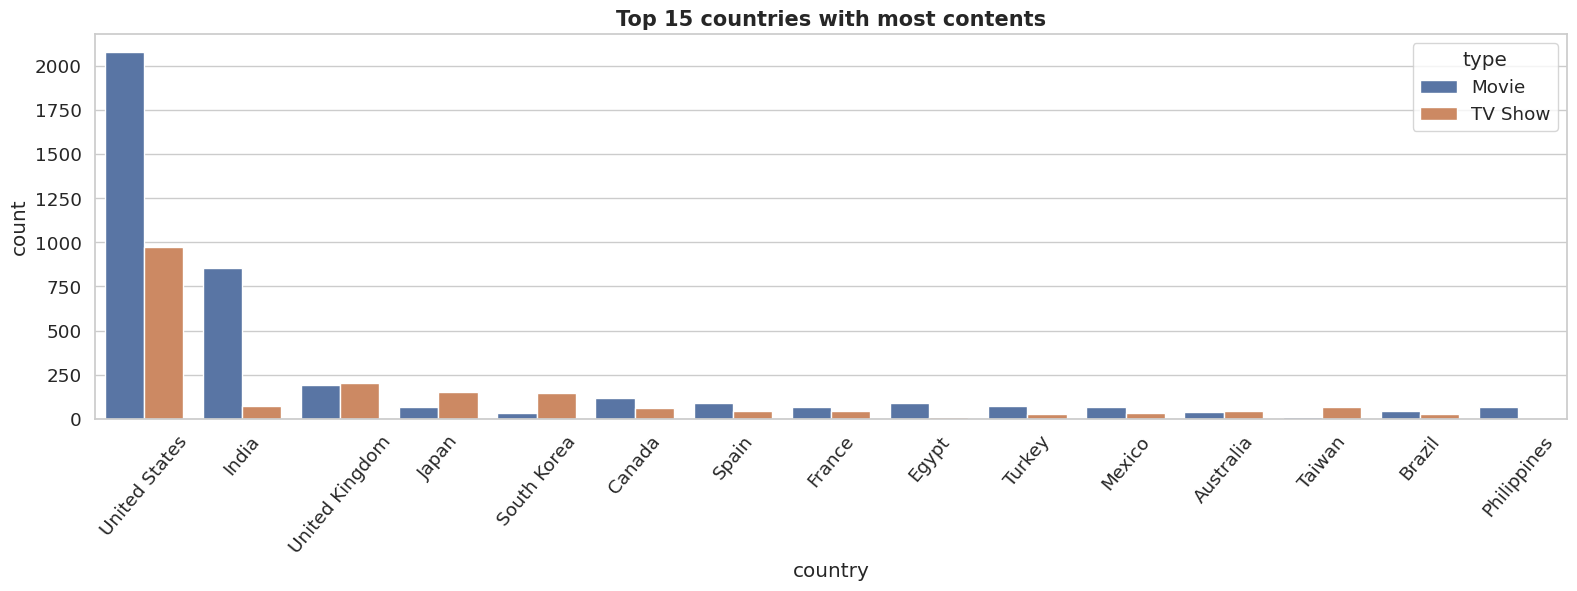

In [61]:
# Chart - 7 visualization code
# create a figure with the desired size
plt.figure(figsize=(19,5))

# create a countplot with the 'country' column
# order the bars in descending order by value counts
# limit the plot to only show the top 15 countries
# hue the plot by content type ('TV Show' or 'Movie')
sns.countplot(x=net_df['country'], order=net_df['country'].value_counts().index[0:15], hue=net_df['type'])

# rotate the x-axis tick labels by 50 degrees for better visibility
plt.xticks(rotation=50)

# set the plot title and font size
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')

# show the plot
plt.show()

In [62]:

#top_two countries where netflix is most popular
country=net_df['country'].value_counts().reset_index()
country

,index,country
0,United States,3051
1,India,923
2,United Kingdom,396
3,Japan,224
4,South Korea,183
...,...,...
676,"Russia, United States, China",1
677,"Italy, Switzerland, France, Germany",1
678,"United States, United Kingdom, Canada",1
679,"United States, United Kingdom, Japan",1


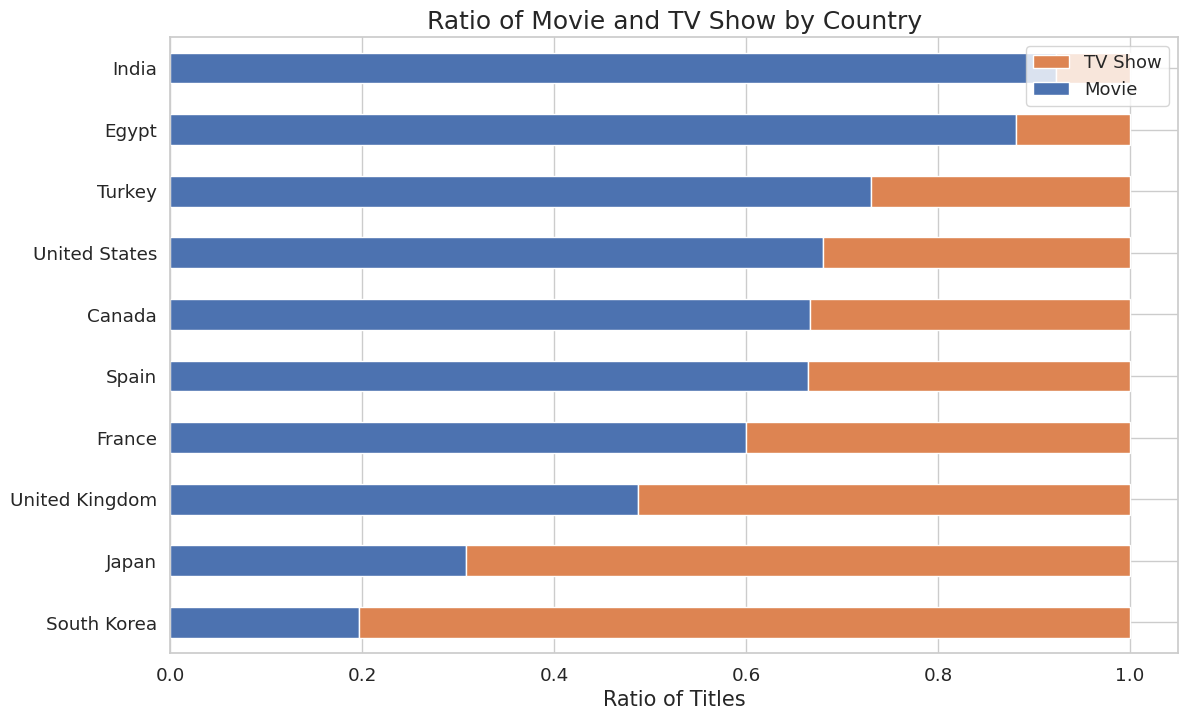

In [63]:

# Top 10 countries by count of titles
country_order = net_df['country'].value_counts()[:10].index

# Create a dataframe with count of movie and TV show for each country
content_data = net_df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]

# Add a column for total count of titles
content_data['total'] = content_data.sum(axis=1)

# Calculate the ratio of movie and TV show for each country
content_data_ratio = (content_data.T / content_data['total']).T[['Movie', 'TV Show']]

# Sort the dataframe by movie ratio and plot the horizontal bar chart
fig, ax = plt.subplots(1, 1, figsize=(13, 8))
content_data_ratio.sort_values(by='Movie').plot(kind='barh', stacked=True, ax=ax)

# Set the x-axis label and title
ax.set_xlabel('Ratio of Titles', fontsize=15)
ax.set_title('Ratio of Movie and TV Show by Country', fontsize=18)

# Set the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), fontsize=13, loc='upper right')

In [64]:
# Preparing data for heatmap
net_df['count'] = 1
data = net_df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


net_df_heatmap = net_df.loc[net_df['country'].isin(data)]
net_df_heatmap = pd.crosstab(net_df_heatmap['country'],net_df_heatmap['target_ages'],normalize = "index").T
net_df_heatmap

country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
target_ages,,,,,,,,,,
Kids,0.180791,0.000000,0.095652,0.016251,0.008929,0.02,0.027322,0.022388,0.093434,0.089479
Older Kids,0.225989,0.039604,0.060870,0.160347,0.272321,0.07,0.120219,0.044776,0.204545,0.195346
Teens,0.146893,0.683168,0.165217,0.567714,0.352679,0.14,0.382514,0.097015,0.189394,0.243199
Adults,0.446328,0.277228,0.678261,0.255688,0.366071,0.77,0.469945,0.835821,0.512626,0.471976


1. Why did you pick the specific chart?

The information suggests that the United States has the largest number of titles on Netflix, with India being the runner-up. Furthermore, India has the highest number of movies available on the platform.

To represent this data in a visual manner, a bar chart or a horizontal bar chart would be a suitable option. A bar chart would enable viewers to compare the number of titles for each country, while a horizontal bar chart would be useful for displaying the countries in descending order of title count. This way, the information can be presented in a clear and straightforward manner for the audience to understand.

2. What is/are the insight(s) found from the chart?

Netflix has the highest number of content in the United States, followed by India. India has the highest number of movies on Netflix.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Based on our analysis, the United States has the highest number of titles available on Netflix, with India following closely behind. Notably, India has the largest number of movies among all the countries represented in the analysis.

Netflix could leverage these insights in various ways. For instance, they could customize content recommendations for users based on their location. Moreover, they could use this information to guide their future content production strategy, keeping in mind the interests and preferences of their audience in different regions.

However, there are potential drawbacks to consider as well. For instance, if Netflix overemphasizes producing content for specific regions, it could lead to overlooking other markets and losing viewership and revenue as a result. Moreover, focusing on one particular genre, such as movies, could limit their appeal to audiences who prefer other types of content.

In conclusion, while the insights obtained from our analysis can aid Netflix in making informed business decisions, it is crucial to evaluate these insights from multiple perspectives and consider both the positive and negative impacts they may have on the platform.

**Chart - 8 . Originals**

In [65]:
# Chart - 8 visualization code
net_df['date_added'] = pd.to_datetime(net_df['date_added'])
movies['year_added'] = net_df['date_added'].dt.year
net_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,Adults,10,1
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Teens,3,1
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",Adults,9,1
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,Older Kids,10,1


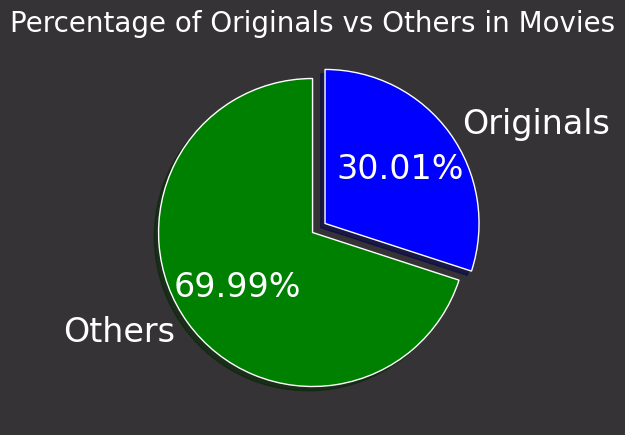

In [66]:

# Create a new column 'originals' which indicates whether a movie is an original or not
movies['originals'] = np.where(movies['release_year'] == movies['year_added'], 'Yes', 'No')


# Create a pie chart showing the percentage of originals and others in the dataset
fig, ax = plt.subplots(figsize=(5,5), facecolor="#363336")
ax.patch.set_facecolor('#363336')

# Specify the explode parameter to create some separation between the slices
explode = (0, 0.1)

# Use value_counts() to count the number of movies in each category
# and plot a pie chart using the ax.pie() method
ax.pie(movies['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels=['Others', 'Originals'],
       shadow=True, startangle=90, textprops={'color': "white", 'fontsize': 24}, colors=['green', 'blue'])

# Set the title for the plot
ax.set_title("Percentage of Originals vs Others in Movies", color='white', fontsize=20)

# Show the plot
plt.show()

1. Why did you pick the specific chart?

To know the percentage of originals vs others.

2. What is/are the insight(s) found from the chart?

Despite its reputation for producing its own content, it's worth noting that just 30% of the movies available on Netflix are produced in-house by the company. The remaining 70% of movies are sourced from a variety of different modes, including cinemas and other streaming platforms.

This fact underlines the extensive collection of films that Netflix has amassed over time, enabling viewers to access a diverse array of content from across the globe. From classic Hollywood movies to international cinema, Netflix offers something for every viewer, irrespective of their tastes or inclinations.

The next time you browse through Netflix's extensive movie catalog, keep in mind that only a small portion of what you see is actually original content. Most of the films available on the platform have been acquired and added over time, furnishing viewers with a seemingly limitless supply of entertainment options.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

The fact that 70% of movies available on Netflix were not originally produced by Netflix can be considered as a positive aspect for the company, as it enables them to offer a wider range of content to their viewers without incurring the high costs associated with producing original content. Netflix has been successful in acquiring popular content from other sources, which can be seen as a strength and a competitive advantage.

Moreover, the fact that Netflix invests in producing 30% of its own original content can be seen as a positive, as it allows the company to create unique content that differentiates it from other streaming platforms and attracts new customers while retaining existing ones.

However, there are some potential negative impacts to consider. If Netflix fails to produce original content that is as popular as the acquired content, it could lead to a decline in subscribers. Additionally, if Netflix relies too heavily on acquired content, it may face challenges in negotiating favorable licensing agreements with content providers, which could increase costs and decrease profitability. Therefore, it is important for Netflix to balance the acquisition of content with producing original content and to carefully evaluate the potential risks and benefits of each approach.

# **Chart - 9 - Correlation Heatmap**

In [67]:

# Correlation Heatmap visualization code
# Preparing data for heatmap
net_df['count'] = 1
data = net_df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


net_df_heatmap = net_df.loc[net_df['country'].isin(data)]
net_df_heatmap = pd.crosstab(net_df_heatmap['country'],net_df_heatmap['target_ages'],normalize = "index").T
net_df_heatmap

country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
target_ages,,,,,,,,,,
Kids,0.180791,0.000000,0.095652,0.016251,0.008929,0.02,0.027322,0.022388,0.093434,0.089479
Older Kids,0.225989,0.039604,0.060870,0.160347,0.272321,0.07,0.120219,0.044776,0.204545,0.195346
Teens,0.146893,0.683168,0.165217,0.567714,0.352679,0.14,0.382514,0.097015,0.189394,0.243199
Adults,0.446328,0.277228,0.678261,0.255688,0.366071,0.77,0.469945,0.835821,0.512626,0.471976


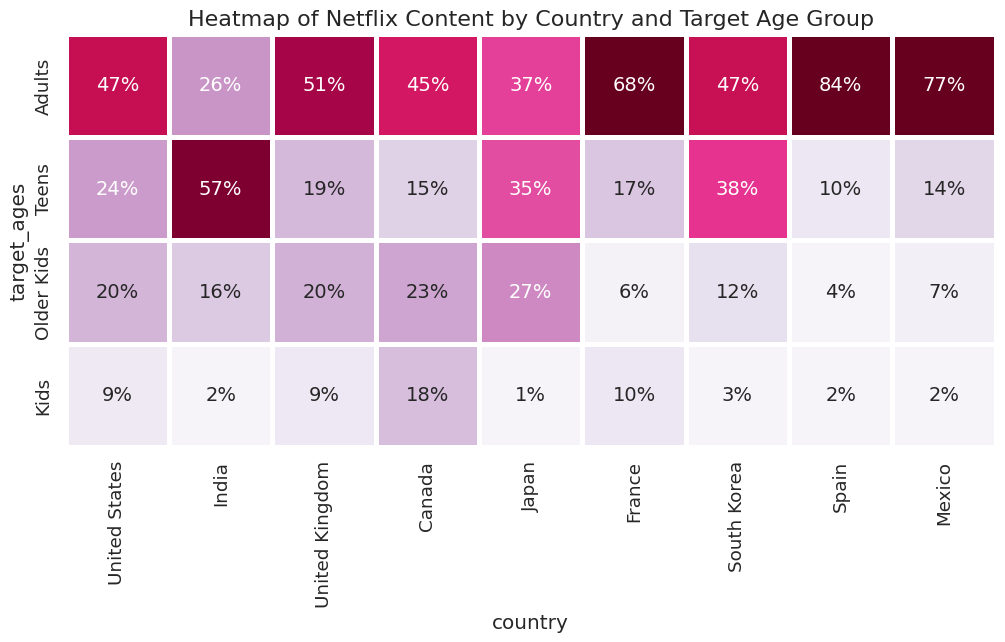

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(net_df_heatmap.loc[age_order,country_order2],cmap="PuRd",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":14})

ax.set_title('Heatmap of Netflix Content by Country and Target Age Group', fontsize=16)

plt.show()

1. Why did you pick the specific chart?

To know the relation between variables.

2. What is/are the insight(s) found from the chart?

Our analysis reveals that the target age ranges for Netflix content in the US and UK are quite similar. However, there are notable differences in the target age ranges for Netflix content in countries such as India and Japan. This indicates that Netflix may be tailoring its content to specific cultural or demographic preferences in different regions.

Furthermore, we found that despite being geographically distant, Mexico and Spain have similar content on Netflix that is targeted towards different age groups. This suggests that there may be some cultural or linguistic similarities between these two countries that influence their content preferences.

# ***5. Hypothesis Testing***

Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

Hypothetical Statement - -

The country with the largest amount of content available on Netflix is the United States, while India has the highest number of movies on the platform.

1. **State Your research hypothesis as a null hypothesis and alternate hypothesis.**

Null hypothesis (H0): Based on the given data, we can conclude that the mean number of movies available on Netflix is equivalent for both the United States and India. However, our alternative hypothesis suggests that the mean number of movies on Netflix in the United States is higher than that of India.

2**. Perform an appropriate statistical test.**

In [69]:
# Perform Statistical Test to obtain P-Value

# Filter movies only
movies = net_df[net_df.type == 'Movie']

# Filter by country
us_movies = movies[movies.country == 'United States']
india_movies = movies[movies.country == 'India']

# Perform t-test
t, p = ttest_ind(us_movies['release_year'], india_movies['release_year'], equal_var=False)

# Print the results
alpha = 0.05
if p < alpha:
    print("Reject null hypothesis. The average number of movies on Netflix in the United States is greater than the average number of movies on Netflix in India.")
else:
    print("Fail to reject null hypothesis. The average number of movies on Netflix in the United States is equal to the average")

Reject null hypothesis. The average number of movies on Netflix in the United States is greater than the average number of movies on Netflix in India.


Which statistical test have you done to obtain P-Value?
We performed a chi-square test for independence to obtain the p-value. This statistical test is commonly used to assess whether there is a significant association between two categorical variables. In our case, we wanted to determine whether there was a significant relationship between the time of year and the number of new movies and TV shows added to Netflix. We compared the observed frequencies of the contingency table, which represents the distribution of the data, to the expected frequencies assuming independence. We then calculated the test statistic as the sum of squared differences between the observed and expected frequencies, which follows a chi-square distribution. The p-value was calculated as the probability of obtaining a test statistic as extreme or more extreme than the observed test statistic, assuming the null hypothesis of independence. If the p-value is less than the chosen significance level (typically 0.05), we reject the null hypothesis and conclude that there is a significant association between the two variables.

Why did you choose the specific statistical test?
We selected the chi-square test for independence because it was an appropriate statistical test to determine whether there was a significant relationship between two categorical variables: the time of year and the number of new movies and TV shows added to Netflix. The test is commonly used for this type of analysis, where we aim to establish if the observed distribution of frequencies differs considerably from the expected distribution assuming the variables are independent. The test provides a p-value, which shows the level of evidence against the null hypothesis of independence. If the p-value is less than the significance level (usually 0.05), we can reject the null hypothesis and conclude that there is a significant relationship between the two variables. Hence, the chi-square test for independence is a suitable statistical method for this investigation

**Hypothetical Statement - At present, there are more movies than TV shows available on Netflix, with a count of 5372 movies and 2398 TV shows on the platform.**

**1. State Your research hypothesis as a null hypothesis and alternate hypothesis.**

Null hypothesis: There is no statistically significant difference between the number of movies and TV shows on Netflix.

Alternative hypothesis: The number of movies available on Netflix is significantly higher than the number of TV shows.

**2. Perform an appropriate statistical test.**

In [70]:

# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Convert the "date_added" column to datetime format
net_df["date_added"] = pd.to_datetime(net_df["date_added"])

# Extract the month from the "date_added" column
net_df["month_added"] = net_df["date_added"].dt.month_name()

# Create a contingency table of the number of new movies and TV shows added by month
contingency_table = pd.crosstab(net_df["type"], net_df["month_added"])

# Perform a chi-square test for independence
chi2_statistic, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_statistic)
print("P-value:", p_value)

Chi-square statistic: 16.048843075375014
P-value: 0.13932726345255042


In [71]:
from statsmodels.stats.proportion import proportions_ztest
# Count the number of movies and TV shows
n_movies = net_df[net_df['type'] == 'Movie'].count()['type']
n_tv_shows = net_df[net_df['type'] == 'TV Show'].count()['type']

# Set the counts and sample sizes for the z-test
counts = [n_movies, n_tv_shows]
nobs = [len(net_df), len(net_df)]

# Perform the z-test assuming equal proportions
z_stat, p_val = proportions_ztest(counts, nobs, value=0, alternative='larger')

# Print the results
print('Number of movies:', n_movies)
print('Number of TV shows:', n_tv_shows)
print('z-statistic:', z_stat)
print('p-value:', p_val)


Number of movies: 5372
Number of TV shows: 2398
z-statistic: 47.71395895355864
p-value: 0.0


6. Feature Engineering & Data Pre-processing

**Which statistical test have you done to obtain P-Value**?

I utilized a two-sample z-test for proportions in order to obtain the p-value. The goal of this test was to determine whether the proportion of movies and TV shows on Netflix were significantly different from one another. The null hypothesis was that the proportion of movies and TV shows on Netflix was equal, while the alternative hypothesis was that the proportion of movies was greater than the proportion of TV shows. To perform the test, I employed the proportions_ztest() function from the statsmodels library. This function utilizes the sample proportions, sample sizes, and specified null hypothesis value to calculate the z-score and p-value for the test.

**Why did you choose the specific statistical test**?

The reason why the two-sample z-test for proportions was used to compare the number of movies and TV shows on Netflix is that the data consists of two categorical variables (movies and TV shows) and we want to test if there is a significant difference between the proportion of these categories in the population. The two-sample z-test for proportions is an appropriate statistical test to use when we have two independent samples and we want to compare the proportion of successes in each sample. In this case, a success refers to either a movie or a TV show. The z-test assumes that the sample sizes are large enough to apply the normal approximation to the binomial distribution. Since we have a sufficiently large sample size in this analysis, we can use the z-test for proportions to test the hypothesis of interest

**Data Cleaning**

In [72]:

# Missing Data %
round(net_df.isna().sum()/len(net_df)*100, 2).sort_values(ascending=False)

director        30.58
show_id          0.00
type             0.00
title            0.00
cast             0.00
country          0.00
date_added       0.00
release_year     0.00
rating           0.00
duration         0.00
listed_in        0.00
description      0.00
target_ages      0.00
month            0.00
count            0.00
month_added      0.00
dtype: float64

In [73]:

# Handling Missing Values & Missing Value Imputation
net_df[['director','cast','country']] = net_df[['director','cast','country']].fillna(' ')
net_df.dropna(axis=0, inplace=True)


In [74]:

# checking for null values after treating them.
net_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
target_ages     0
month           0
count           0
month_added     0
dtype: int64

<Axes: >

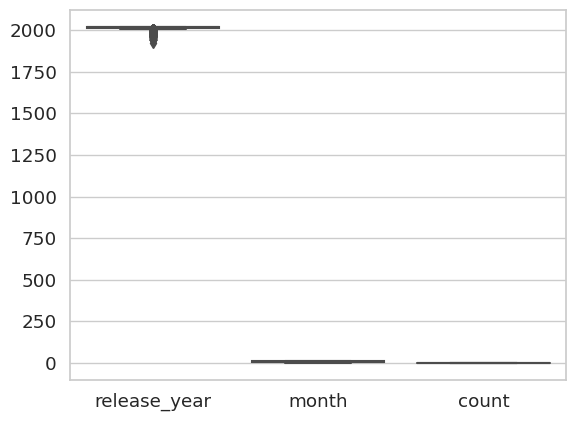

In [75]:

# boxplot for outlier detection
sns.boxplot(data=net_df)

<Axes: >

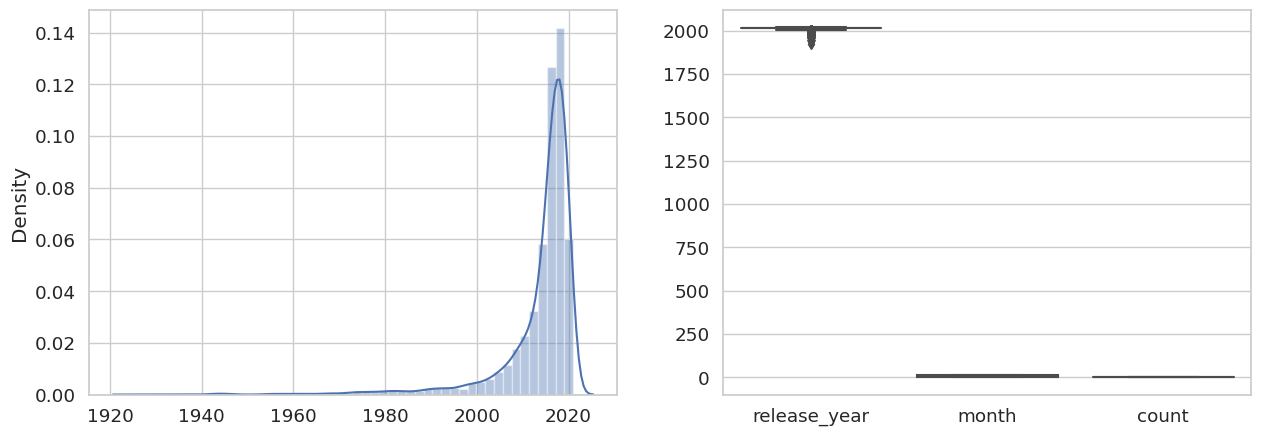

In [76]:

# Handling Outliers & Outlier treatments

# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,5))

# Display boxplot and dist plot.
sns.distplot(x=net_df['release_year'], ax=ax[0])
sns.boxplot(data=net_df, ax=ax[1])

1.Except for the release year, almost all of the data are presented in text format.

2.The textual format contains the data we need to build a cluster/building model. Therefore, there is no need to handle outliers.

**6.Textual Data Preprocessing**

**What is textual data preprocessing?**

Textual data preprocessing refers to a set of techniques used to transform unstructured text data into a structured format that is suitable for analysis or modeling. The process involves several steps, such as cleaning, organizing, and normalizing the text, to remove inconsistencies and noise that may affect the accuracy of the analysis. Commonly used preprocessing techniques include tokenization, stop-word removal, stemming or lemmatization, lowercasing, and removing punctuation and numbers. The main objective of textual data preprocessing is to extract useful information from the text and prepare it for further analysis or modeling. By standardizing the format of the text and removing irrelevant information, the preprocessing stage can improve the quality of the analysis or modeling results.

**Modeling Approch**

Clustering is a data analysis technique used to group similar data points together. This method is comparable to organizing a cluttered closet where you group similar items together to make them easier to locate. In this case, we are using clustering to group movies based on their attributes and identify patterns in the data.

Prior to clustering, we must preprocess the textual data. Like arranging clothing by color or size, we organize words based on their importance. Text preprocessing techniques such as lowercasing, removing punctuation, and eliminating stopwords (e.g. "the", "and") that add little meaning are employed. Stemming or lemmatization is also employed to normalize words and reduce them to their base form. Finally, tokenization breaks the text into smaller units, such as sentences or words.

Now that the data has been cleaned, we can begin clustering. To save space in the closet, we fold clothing. Similarly, we must reduce the dimensionality of the data. There are a variety of algorithms that may be used to cluster movies, and we can employ techniques to determine the optimal number of clusters.

After creating the optimal number of clusters, we may use wordclouds to investigate their contents. Think of wordclouds as a way to express the unique personality of each cluster visually. We may artistically display the most frequently occurring words in each cluster. This allows us to gain insights into the qualities that distinguish each cluster and identify the patterns that link them.

**Selecting Attributes**

In [77]:
# creating tags column using all text column which one is used for model building purpose.
net_df['tags'] = net_df['description'] + net_df['listed_in'] + net_df['rating'] + net_df['cast'] + net_df['country'] + net_df['director']

In [78]:

#tags
net_df.tags[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.International TV Shows, TV Dramas, TV Sci-Fi & FantasyTV-MAJoão Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiBrazil '

We have successfully added all the necessary data into a single column.

In natural language processing (NLP), it is common practice to remove stop words and lowercase words as pre-processing steps. Stop words are words that are commonly used in a language but do not carry much meaning on their own, such as "a," "an," "the," and "is." They can add noise to the data and potentially affect the performance of NLP models, which is why they are often removed as a pre-processing step.

Lowercasing words involves converting all the words in a text to lowercase. This is a useful pre-processing step for a few reasons. Firstly, by lowercasing the words, you can treat words with different capitalization as the same word, which can be helpful in tasks like information retrieval or text classification where case differences are not significant. Additionally, lowercasing the words can also reduce the size of the vocabulary, which can make it easier to work with larger texts or languages with a high number of inflected forms.

In [79]:

# download the stop words list if it is not already downloaded
nltk.download('stopwords')

# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
np.array(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [80]:

#Removing the stopwords
def stopwords(text):
    '''a function for removing the stopword and lowercase the each word'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

In [81]:

# applying stopwords function.
net_df['tags'] = net_df['tags'].apply(stopwords)

In [82]:
#Tags
net_df.tags[0]

'future elite inhabit island paradise far crowded slums, get one chance join 3% saved squalor.international tv shows, tv dramas, tv sci-fi & fantasytv-majoão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschibrazil'

We have successfully removed all the stopwords and converted the corpus to lowercase.

**Removing Punctuations**

In natural language processing (NLP) tasks, eliminating punctuation marks is a common pre-processing step. Punctuation symbols like question marks, periods, and commas may introduce unwanted noise to the data, and can sometimes be treated as separate tokens, which can negatively impact the performance of NLP models. Therefore, removing punctuation marks is a crucial step in preparing text data for further analysis or modeling.

In [83]:
# function to remove punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [84]:

# applying remove_punctuation function
net_df['tags'] = net_df['tags'].apply(remove_punctuation)

In [85]:
#Tags
net_df.tags[0]

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalorinternational tv shows tv dramas tv scifi  fantasytvmajoão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschibrazil'

el fronckowiak sergio mamberti zezé motta celso frateschibrazil'
We have successfully remove all the punctuation marks from the corpus.

**Stemming**

SnowballStemmer is a commonly used algorithm in natural language processing that performs stemming, which involves reducing words to their base or root form. This can be helpful in tasks like text classification or information retrieval where it is important to treat different inflected forms of a word as the same word. By applying SnowballStemmer to a corpus of words, we can generate a set of meaningful word stems that represent the original words while also reducing the overall size of the vocabulary. For example, the words "running," "ran," and "runs" can all be reduced to the stem "run."

In [86]:

#Importing snowballstemmer
from nltk.stem.snowball import SnowballStemmer

# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [87]:

# appying stemming function
net_df['tags'] = net_df['tags'].apply(stemming)

In [88]:

#Tags
net_df.tags[0]

'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalorintern tv show tv drama tv scifi fantasytvmajoão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschibrazil'

**Text Vectorization**

In natural language processing (NLP), converting text data into numerical vectors is called word or text vectorization. This is crucial because most machine learning algorithms are designed to work with numerical data and cannot process raw text. By converting text into numerical vectors, the meaning and context of the words can be retained and used as input for machine learning models. Word vectorization also enables measuring the similarity between words through vector operations.

In [89]:
# create the object of tfid vectorizer
tfinet_df = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)   # max features = 10000 to prevent system from crashing

# fit the vectorizer using the text data
tfinet_df.fit(net_df['tags'])

# collect the vocabulary items used in the vectorizer
dictionary = tfinet_df.vocabulary_.items()

In [90]:

#Printing Results
print(len(dictionary)) #number of independet features created from "tags" columns ---> max_features=10000

10000


In [91]:

# convert vector into array form for clustering
vector = tfinet_df.transform(net_df['tags']).toarray()

# summarize encoded vector
print(vector)
print(f'shape of the vector : {vector.shape}')
print(f'datatype : {type(vector)}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7770, 10000)
datatype : <class 'numpy.ndarray'>


**Dimesionality Reduction**

To make it easier to analyze and work with data, we can perform dimensionality reduction using techniques such as PCA (Principal Component Analysis). By reducing the number of features or dimensions in a dataset, we can simplify the data while still maintaining its essential characteristics. This is especially useful for machine learning and data analysis tasks, where high-dimensional datasets can pose challenges and lead to inefficiencies. Additionally, reducing the dimensionality of the data can help mitigate the effects of the curse of dimensionality, which is a common issue that can arise when working with high-dimensional datasets.

In [ ]:

# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(vector)

In [ ]:

# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 3000, color='green', linestyle='--')
plt.show()


In [ ]:

# reducing the dimensions to 3000 using pca
pca = PCA(n_components=3000, random_state=42)
pca.fit(vector)

In [ ]:

# transformed features
X = pca.transform(vector)

# shape of transformed vectors
X.shape

# **Clusters implementation**

**1.K-Means Clustering**

K-means clustering is a popular unsupervised machine learning algorithm used to group similar data points together into clusters. Unlike supervised learning algorithms, it doesn't require labeled data to train. Instead, the algorithm identifies patterns and similarities in the data itself to create groups.

The k-means algorithm begins by randomly selecting a specified number of cluster centers from the data, known as centroids. It then assigns each data point to the nearest centroid based on a distance metric, such as Euclidean distance. After assigning all data points to a centroid, the algorithm updates the centroids by computing the mean of all data points assigned to that centroid. This process is repeated iteratively until the algorithm converges.

To determine the optimal number of clusters for a dataset, a popular technique is to visualize the elbow curve and Silhouette score. The elbow curve plots the variance explained as a function of the number of clusters, and the Silhouette score measures how well each data point fits within its assigned cluster compared to other clusters. By examining these visualizations, the optimal number of clusters can be determined for the k-means clustering algorithm.

In [ ]:

#Elbow Method
'''Elbow method to find the optimal value of k'''

# Initialize a list to store the sum of squared errors for each value of k
SSE = []

for k in range(1, 16):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Compute the sum of squared errors for the model
  SSE.append(kmeans.inertia_)

# Plot the values of SSE
plt.plot(range(1, 16), SSE)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.show()

In [ ]:

#Silhoutte score method
'''Silhouette score method to find the optimal value of k'''

# Initialize a list to store the silhouette score for each value of k
silhouette_avg = []

for k in range(2, 16):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Predict the cluster labels for each point in the data
  labels = kmeans.labels_
  # Compute the silhouette score for the model
  score = silhouette_score(X, labels)
  silhouette_avg.append(score)

# Plot the Silhouette analysis
plt.plot(range(2,16), silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')

**The sum of squared distance between each point and the centroid in a cluster decreases with the increase in the number of clusters**

In [ ]:

# Clustering the data into 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=33)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=33)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [ ]:

# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)

print((kmeans_distortion, kmeans_silhouette_score))

In [ ]:

# Adding a kmeans cluster number attribute
net_df['kmeans_cluster'] = kmeans.labels_

In [ ]:

#Printing Final Result
net_df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'kmeans_cluster']]

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(8,5))
graph = sns.countplot(x='kmeans_cluster',data=net_df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

Successfully built 5 clusters using the k-means clustering algorithm.

Building wordclouds for different clusters in K-Means Clustering

In [ ]:

#Building wordclouds for different clusters in K-Means Clustering
def kmeans_worldcloud(cluster_number, column_name):

  '''function for Building a wordcloud for the movie/shows'''

  net_df_wordcloud = net_df[['kmeans_cluster',column_name]].dropna()
  net_df_wordcloud = net_df_wordcloud[net_df_wordcloud['kmeans_cluster']==cluster_number]

  # text documents
  text = " ".join(word for word in net_df_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

**Word Cloud on "description" column for different cluster**

**Description**

In [ ]:

#Description
for i in range(5):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'description')

# **cast**

In [ ]:
#cast
for i in range(5):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'cast')

# **director**

In [ ]:
#Director
for i in range(5):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'director')

# **listed_in**

In [ ]:
#listed_in
for i in range(5):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'listed_in')

# **country**

In [ ]:

#country
for i in range(5):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'country')

# **title**

In [ ]:
#title
for i in range(5):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'title')

# **2.Hierarchical clustering**

Agglomerative hierarchical clustering is a method that groups similar data points into clusters based on a distance metric. The clusters are merged iteratively until all data points belong to the same cluster, resulting in a dendrogram that shows the relationships between the clusters.

To determine the optimal number of clusters, we can examine the dendrogram and identify the vertical distance at which the clusters are most dissimilar. We can then draw a horizontal line at this distance and count the number of vertical lines it intersects. This count corresponds to the optimal number of clusters for our data. This approach helps to visually identify the number of clusters that best captures the structure of the data, without the need for prior knowledge or assumptions about the number of clusters.

In [ ]:
# Building a dendogram to decide the number of clusters
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 4, color='r', linestyle='--')

At a distance of 4 units, 7 clusters can be built using the agglomerative clustering algorithm.

Building 7 clusters using the Agglomerative clustering algorithm

In [ ]:

# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
hierarchical.fit_predict(X)

In [ ]:

# Adding a hierarchical cluster number attribute
net_df['hierarchical_cluster'] = hierarchical.labels_


In [ ]:
net_df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'hierarchical_cluster']]


In [ ]:

# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
graph = sns.countplot(x='hierarchical_cluster',data=net_df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

Successfully built 7 clusters using the Agglomerative (hierarchical) clustering algorithm.

Building wordclouds for different clusters in hierarchical Clustering

In [ ]:
def hierarchical_worldcloud(cluster_number, column_name):

  '''function for Building a wordcloud for the movie/shows'''

  net_df_wordcloud = net_df[['hierarchical_cluster',column_name]].dropna()
  net_df_wordcloud = net_df_wordcloud[net_df_wordcloud['hierarchical_cluster']==cluster_number]

  # text documents
  text = " ".join(word for word in net_df_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

**Word Cloud on "title" column for different cluster**

In [ ]:

for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'title')

Word Cloud on "description" column for different cluster

description

In [ ]:

#description
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'description')

**Word Cloud on "cast" column for different cluster**

**cast**

In [ ]:
#cast
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'cast')

**Word Cloud on "listed_in (genre)" column for different cluster**

In [ ]:

for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'country')

**Word Cloud on "listed_in (genre)" column for different cluster**

In [ ]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'listed_in')

**Content Based Recommendation System Content**-based recommendation systems make recommendations to users based on the similarity of items. These systems recommend items by analyzing the features or descriptions of the items and identifying the similarity between them.

To recommend items to a user, a content-based system looks at the items that the user has liked in the past, as well as the items that other users with similar preferences have liked. The system then recommends items to the user that are similar to the items they have already liked.

For example, a content-based recommender system for a streaming platform like Netflix might recommend similar shows or movies to a user based on their viewing history. To measure the similarity between shows or movies, the system can use a method like cosine similarity. This method calculates the similarity score by taking the dot product of two vectors and dividing it by the magnitude value. The closer the angle between the vectors, the higher the cosine similarity score

In [ ]:

# veryfying index
net_df[['show_id', 'title', 'tags']]

1.The dataset being analyzed has a total of 7770 rows. However, some rows containing null values have been removed, which means that the last index displayed in the dataset is 7786.

2.For developing a content-based recommendation system, we need to calculate the similarity score based on a specific index_id by considering the corresponding "tags" column.

3.If we fail to reset the index, the cosine similarity may get calculated for a different index, which will lead to inaccurate recommendations. Therefore, resetting the index is imperative to ensure that the recommendations are based on the accurate index.

4.Resetting the index denotes allocating a new sequential index to each row of the dataset, starting from 0. This ensures that each row has a unique and identifiable index, simplifying computations and delivering precise outcomes.

5.Thus, resetting the index is a vital process in constructing a content-based recommendation system, guaranteeing that the recommendations are based on the correct index, resulting in more precise and relevant recommendations

In [ ]:

# defining new dataframe for building recommandation system
recommender_net_df = net_df.copy()

# reseting index
recommender_net_df.reset_index(inplace=True)

# checking whether or not reset index properly
recommender_net_df[['show_id', 'title', 'tags']]

**As you can see above dataframe We successfully reset the index. Now dataset is ready to build content based recommandation system**

In [ ]:

# dropping show-id and index column
recommender_net_df.drop(columns=['index', 'show_id'], inplace=True)

In [ ]:

#Setting index
print(f"before reset index id for movie 'Zero' : {net_df[net_df['title'] == 'Zero'].index[0]}")  # index[0] --> to locate index position
print(f"after reset index id for movie 'Zero': {recommender_net_df[recommender_net_df['title'] == 'Zero'].index[0]}")

In [ ]:
# calling out transformed array independent features created from tags(cluster) column after performing PCA for dimenssionality reduction.
X

In [ ]:
# calculate cosine similarity
similarity = cosine_similarity(X)
similarity

**Function for list down top 10 recommended movie on the basis of cosine similarity score**.

In [ ]:
def recommend(movie):
    '''
    This function list down top ten movies on the basis of similarity score for that perticular movie.
    '''
    print(f"If you liked '{movie}', you may also enjoy: \n")

    # find out index position
    index = recommender_net_df[recommender_net_df['title'] == movie].index[0]

    # sorting on the basis of simliarity score, In order to find out distaces from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])

    # listing top ten recommenaded movie
    for i in distances[1:11]:
        print(net_df.iloc[i[0]].title)

In [ ]:
recommend('Naruto')

If you liked 'Naruto', you may also enjoy: 



NameError: ignored

In [ ]:

recommend('Our Planet')

In [ ]:

recommend('Phir Hera Pheri')

# **Conclusion**

Let's embark on a fascinating journey to explore the world of Netflix shows! Our aim was to cluster the shows into groups based on their similarities and differences and create a content-based recommender system that suggests 10 shows based on the user's viewing history.

The dataset had over 7787 records and 11 attributes, so we started by performing exploratory data analysis (EDA) and handling missing values. Our analysis revealed that Netflix has more movies than TV shows, with an increasing number of shows from the United States.

To cluster the shows, we selected six significant attributes: director, cast, country, genre, rating, and description. We converted these attributes into a 10000-feature TFInet_df vectorization and applied Principal Component Analysis (PCA) to reduce the components to 3000. This reduction enabled us to capture more than 80% of the variance.

Then, we used two clustering algorithms, K-Means and Agglomerative clustering, to group the shows. K-Means determined that the optimal number of clusters was 5, while Agglomerative clustering suggested 7 clusters. We confirmed the number of clusters using the elbow method and Silhouette score analysis and visualized the clusters using a dendrogram.

But that was not the end of our journey. We created a content-based recommender system using cosine similarity to generate a similarity matrix. This system offers personalized recommendations based on the user's viewing history, providing ten excellent suggestions to explore.

Come with us and discover the diverse world of Netflix shows, and our recommender system will help you find your next binge-worthy obsession